In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.stats import f_oneway
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [2]:
df = pd.read_csv("../data/total_df.csv", index_col="Unnamed: 0")

In [3]:
pd.set_option('display.max_columns', None)
df.sample()

id_web        lat      long  \
114107  121105  50.817481  5.132447   

                                                  comment language  sentiment  \
114107  kissed the girl i loved for 2 years on a bench...       en     0.8225   

        type_sentiment  characters  emotionality country_name country_code  \
114107               3         139      0.044702      Belgium          BEL   

                       region income_group  mean_stability   mean_law  \
114107  Europe & Central Asia  High income       99.685534  94.452679   

        mean_female_seats  mean_voice      mean_gdp  mean_children_out  \
114107          33.807775   91.837121  3.044692e+09           2.055334   

        mean_ed_exp  mean_literacy  mean_ARV_coverage  mean_health_exp  \
114107     5.172679      97.943596          79.673529         9.421876   

        mean_UHC_coverage  mean_rights  mean_sex_index             censor  \
114107          84.297619      8.71905             0.0  01. No censorship   

                             transition  mean_hate_protection  cluster  
114107  01. Legal, surgery not required              0.714286      5.0

In [4]:
df.columns

Index(['id_web', 'lat', 'long', 'comment', 'language', 'sentiment',
       'type_sentiment', 'characters', 'emotionality', 'country_name',
       'country_code', 'region', 'income_group', 'mean_stability', 'mean_law',
       'mean_female_seats', 'mean_voice', 'mean_gdp', 'mean_children_out',
       'mean_ed_exp', 'mean_literacy', 'mean_ARV_coverage', 'mean_health_exp',
       'mean_UHC_coverage', 'mean_rights', 'mean_sex_index', 'censor',
       'transition', 'mean_hate_protection', 'cluster'],
      dtype='object')

# Discourse by mean_stability:

## Discourse as sentiment

**NO SIGNIFICANCE**

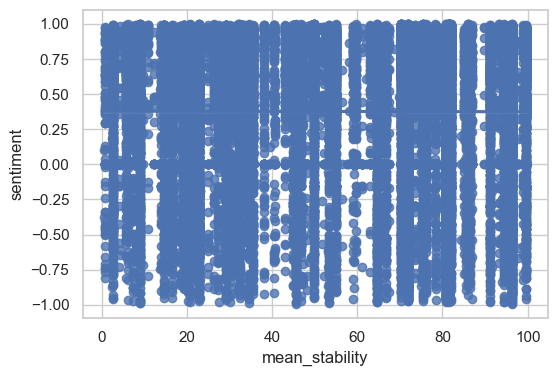

In [5]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_stability, fit_reg=True);

In [6]:
df[["sentiment", "mean_stability"]].corr()

sentiment  mean_stability
sentiment        1.000000       -0.002342
mean_stability  -0.002342        1.000000

In [7]:
results = smf.ols("sentiment ~ mean_stability", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept       0.000000  0.378710
mean_stability  0.534625 -0.000042

## Discourse as type_sentiment

ANOVA and Multinomial Logistic Regression

**SIGNIFICANT** and negative **FOR NEUTRAL SENTIMENT** (Category of reference is negative sentiment)

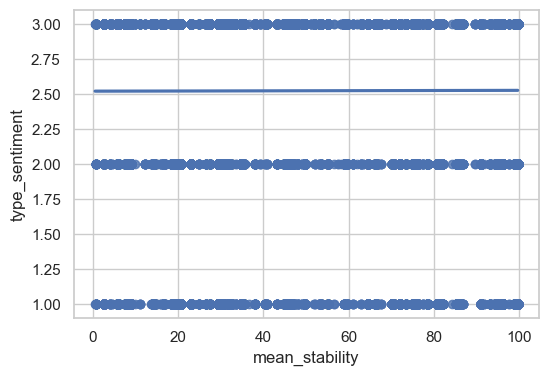

In [8]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_stability, fit_reg=True);

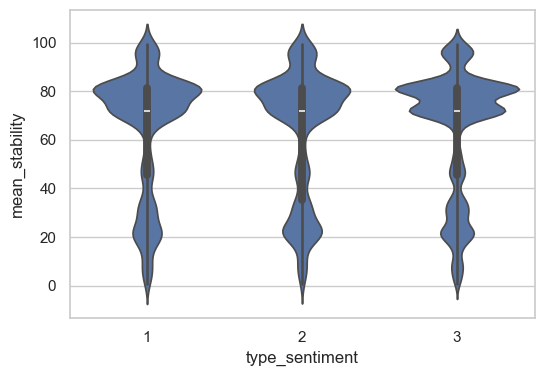

In [9]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_stability);

In [10]:
group1 = df[["mean_stability"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_stability"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_stability"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([11.67912536]), array([8.48520965e-06]))

In [11]:
results = smf.mnlogit("type_sentiment ~ mean_stability", data = df[["type_sentiment", "mean_stability"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")

Optimization terminated successfully.
         Current function value: 0.855798
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                               
Intercept          1.882067e-16          0.000000        0.290138   
mean_stability     2.614555e-05          0.289541       -0.002147   

                params_positive  
index                            
Intercept              1.528604  
mean_stability        -0.000443

## Discourse as emotionality

**SIGNIFICANT** and negative, very small

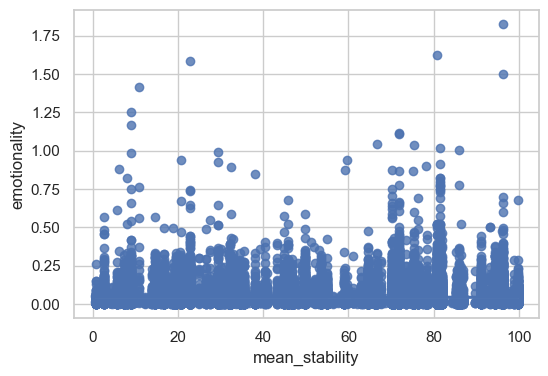

In [12]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_stability, fit_reg=True);

In [13]:
df[["emotionality", "mean_stability"]].corr()

emotionality  mean_stability
emotionality        1.000000       -0.011746
mean_stability     -0.011746        1.000000

In [14]:
results = smf.ols("emotionality ~ mean_stability", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept       0.000000  0.046127
mean_stability  0.001841 -0.000025

# Discourse by mean_law

## Discourse as sentiment

Low negative corr, but high significance.

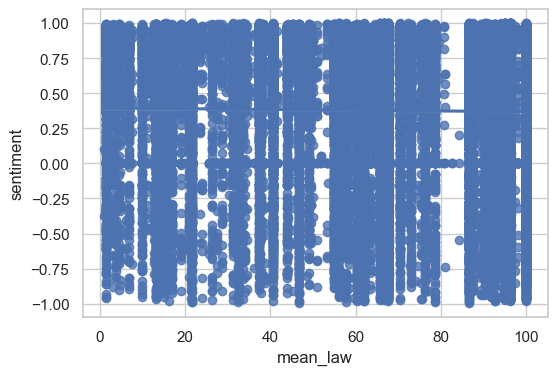

In [15]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_law, fit_reg=True);

In [16]:
df[["sentiment", "mean_law"]].corr()

sentiment  mean_law
sentiment   1.000000 -0.015196
mean_law   -0.015196  1.000000

In [17]:
results = smf.ols("sentiment ~ mean_law", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept  0.000000  0.395014
mean_law   0.000056 -0.000269

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

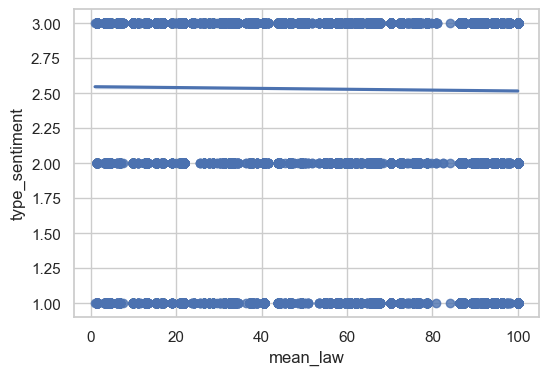

In [18]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_law, fit_reg=True);

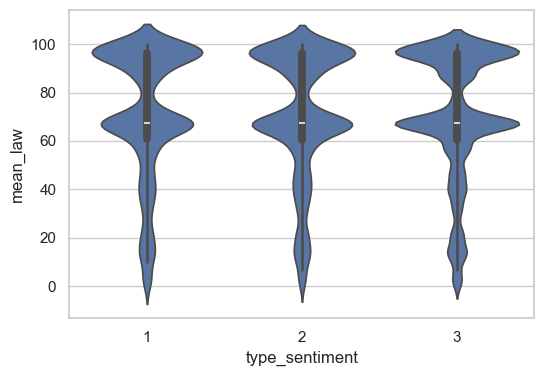

In [19]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_law);

In [20]:
group1 = df[["mean_law"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_law"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_law"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([4.8378563]), array([0.00792666]))

In [21]:
results = smf.mnlogit("type_sentiment ~ mean_law", data = df[["type_sentiment", "mean_law"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")

Optimization terminated successfully.
         Current function value: 0.855894
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  params_positive
index                                                                        
Intercept     1.403176e-09          0.000000        0.232019         1.590792
mean_law      2.772976e-02          0.001899       -0.001114        -0.001280

In [22]:
results = smf.ols("type_sentiment ~ mean_law", data = df[["type_sentiment", "mean_law"]]).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept  0.000000  2.545414
mean_law   0.003977 -0.000306

## Discourse as emotionality
Low negative corr, but high significance.

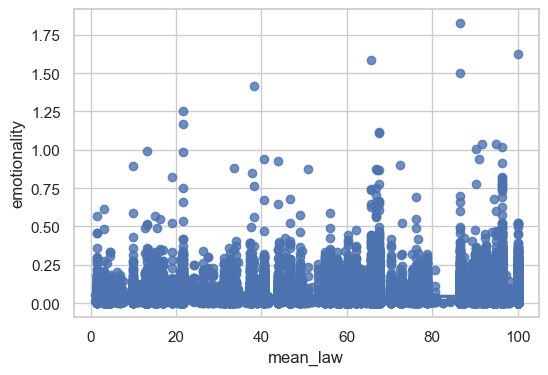

In [23]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_law, fit_reg=True);

In [24]:
df[["emotionality", "mean_law"]].corr()

emotionality  mean_law
emotionality      1.000000 -0.004344
mean_law         -0.004344  1.000000

In [25]:
results = smf.ols("emotionality ~ mean_law", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept  0.000000  0.045148
mean_law   0.249311 -0.000009

# Discourse by mean_female_seats

## Discourse as sentiment
Low negative corr, but significant.

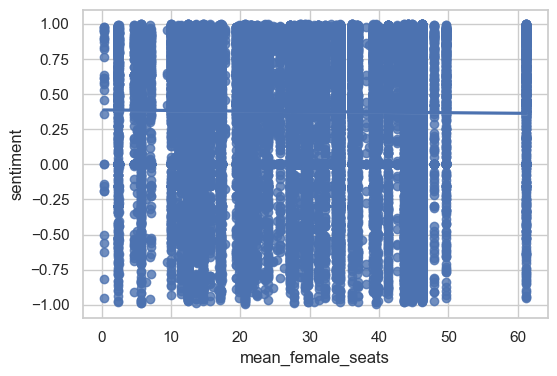

In [26]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_female_seats, fit_reg=True);

In [27]:
df[["sentiment", "mean_female_seats"]].corr()

sentiment  mean_female_seats
sentiment            1.00000           -0.01245
mean_female_seats   -0.01245            1.00000

In [28]:
results = smf.ols("sentiment ~ mean_female_seats", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          0.000000  0.387337
mean_female_seats  0.000973 -0.000395

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

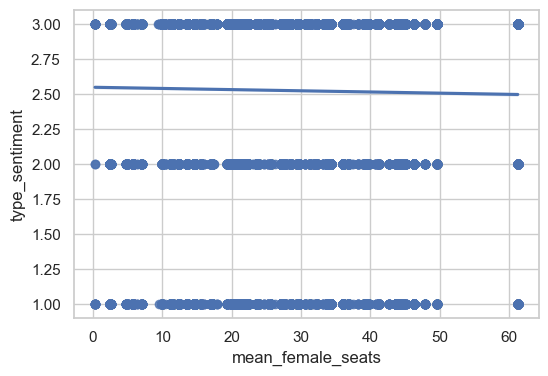

In [29]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_female_seats, fit_reg=True);

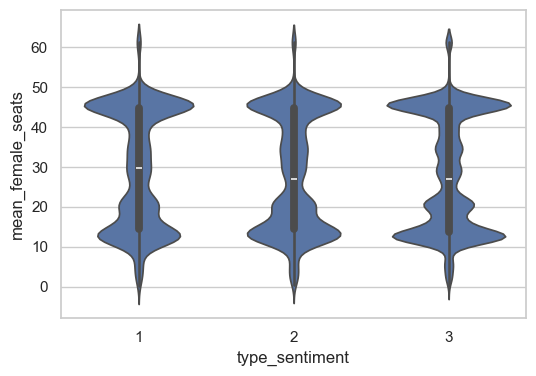

In [30]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_female_seats);

In [31]:
group1 = df[["mean_female_seats"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_female_seats"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_female_seats"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([29.00541077]), array([2.56043663e-13]))

In [32]:
results = smf.mnlogit("type_sentiment ~ mean_female_seats", data = df[["type_sentiment", "mean_female_seats"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.855568
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                                  
Intercept             2.588161e-32      0.000000e+00        0.346919   
mean_female_seats     1.209604e-13      6.057548e-10       -0.006700   

                   params_positive  
index                               
Intercept                 1.632082  
mean_female_seats        -0.004530

## Discourse as emotionality
Low **positive** corr, but high significance.

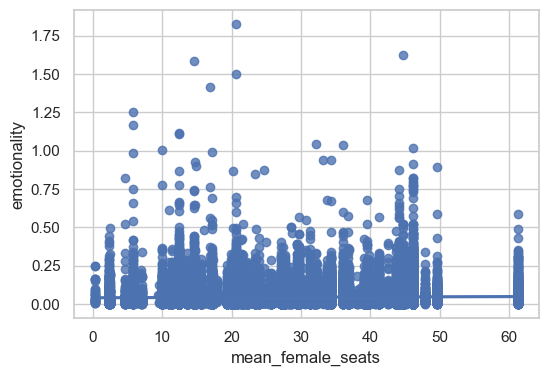

In [33]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_female_seats, fit_reg=True);

In [34]:
df[["emotionality", "mean_female_seats"]].corr()

emotionality  mean_female_seats
emotionality           1.000000           0.033166
mean_female_seats      0.033166           1.000000

In [35]:
results = smf.ols("emotionality ~ mean_female_seats", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          0.000000e+00  0.040863
mean_female_seats  1.520583e-18  0.000126

# Discourse by mean_voice

## Discourse as sentiment
Low negative corr, but high significance.

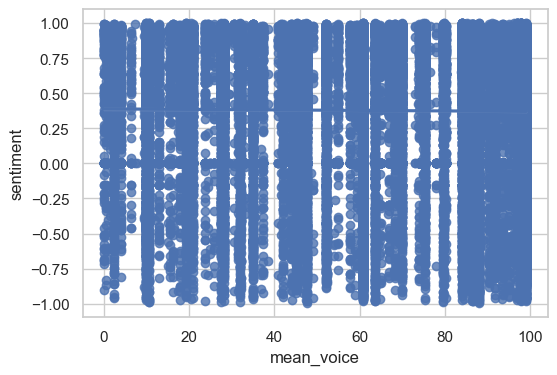

In [36]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_voice, fit_reg=True);

In [37]:
df[["sentiment", "mean_voice"]].corr()

sentiment  mean_voice
sentiment    1.000000   -0.011592
mean_voice  -0.011592    1.000000

In [38]:
results = smf.ols("sentiment ~ mean_voice", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept   0.000000  0.388294
mean_voice  0.002112 -0.000182

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

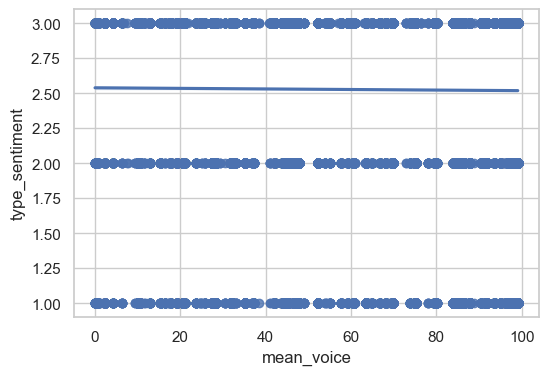

In [39]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_voice, fit_reg=True);

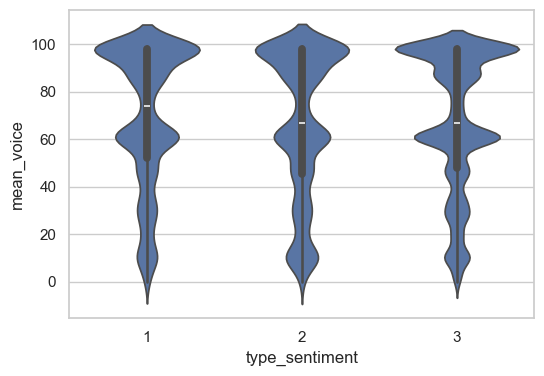

In [40]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_voice);

In [41]:
group1 = df[["mean_voice"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_voice"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_voice"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([31.93629452]), array([1.3694277e-14]))

In [42]:
results = smf.mnlogit("type_sentiment ~ mean_voice", data = df[["type_sentiment", "mean_voice"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.855509
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  params_positive
index                                                                         
Intercept      1.918981e-32          0.000000        0.391888         1.614475
mean_voice     2.484266e-15          0.000005       -0.003545        -0.001677

## Discourse as emotionality
**Positive** corr, but high significance.

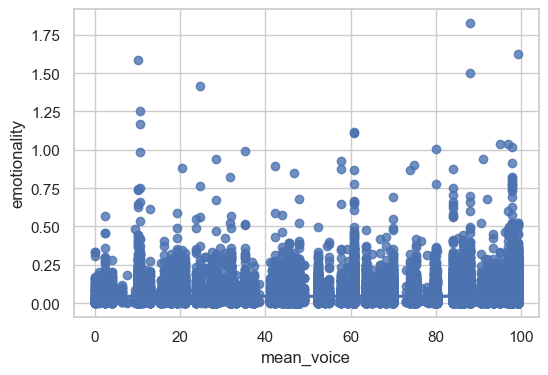

In [43]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_voice, fit_reg=True);

In [44]:
df[["emotionality", "mean_voice"]].corr()

emotionality  mean_voice
emotionality       1.00000     0.00195
mean_voice         0.00195     1.00000

In [45]:
results = smf.ols("emotionality ~ mean_voice", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept   0.000000  0.044247
mean_voice  0.605112  0.000004

# Discourse by mean_gdp

## Discourse as sentiment
Low negative corr, but high significance.

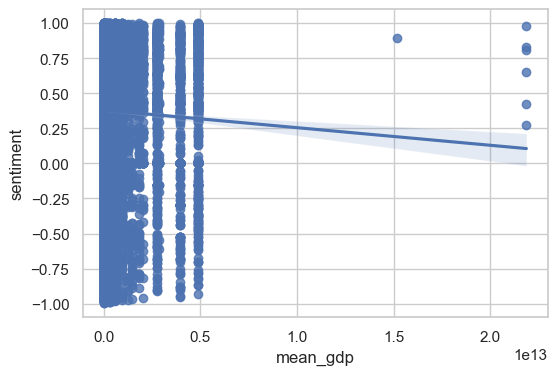

In [46]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_gdp, fit_reg=True);
# Very high mean_gdp has much less comments (Fiji), as the goal is not predicting but describing, I let these models be with outliers

In [47]:
df[["sentiment", "mean_gdp"]].corr()

sentiment  mean_gdp
sentiment   1.000000 -0.016953
mean_gdp   -0.016953  1.000000

In [48]:
results = smf.ols("sentiment ~ mean_gdp", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues          coef
Intercept  0.000000  3.797387e-01
mean_gdp   0.000007 -1.253206e-14

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

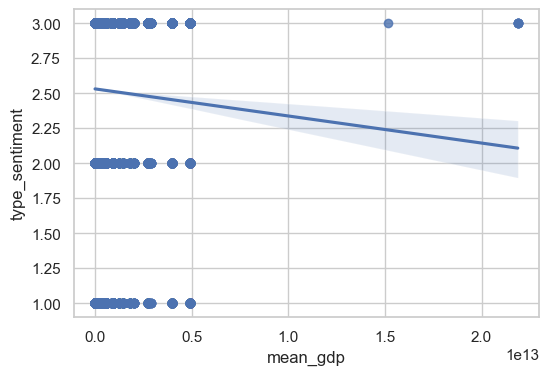

In [49]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_gdp, fit_reg=True);

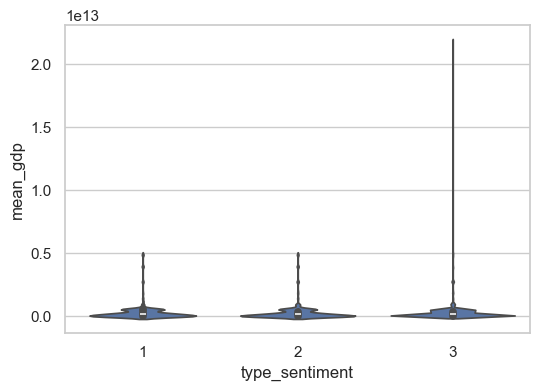

In [50]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_gdp);
# Extremely high GDP have only positive sentiment

In [51]:
group1 = df[["mean_gdp"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_gdp"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_gdp"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([9.62322666]), array([6.6261058e-05]))

In [52]:
results = smf.mnlogit("type_sentiment ~ mean_gdp", data = df[["type_sentiment", "mean_gdp"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")

Optimization terminated successfully.
         Current function value: 0.855806
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  params_positive
index                                                                        
Intercept     7.818082e-28          0.000000    1.596643e-01     1.519531e+00
mean_gdp      2.531318e-01          0.000062   -2.198214e-14    -6.337199e-14

In [53]:
results = smf.ols("type_sentiment ~ mean_gdp", data = df[["type_sentiment", "mean_gdp"]]).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues          coef
Intercept  0.000000  2.529676e+00
mean_gdp   0.000013 -1.934439e-14

## Discourse as emotionality
Very low **positive** corr, but high significance.

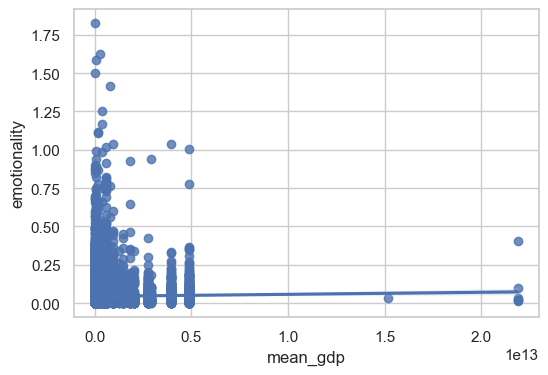

In [54]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_gdp, fit_reg=True);

In [55]:
df[["emotionality", "mean_gdp"]].corr()

emotionality  mean_gdp
emotionality      1.000000  0.014856
mean_gdp          0.014856  1.000000

In [56]:
results = smf.ols("emotionality ~ mean_gdp", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues          coef
Intercept  0.000000  4.409065e-02
mean_gdp   0.000083  1.319243e-15

# Discourse by mean_children_out

## Discourse as sentiment
Low **positive** corr, but high significance.

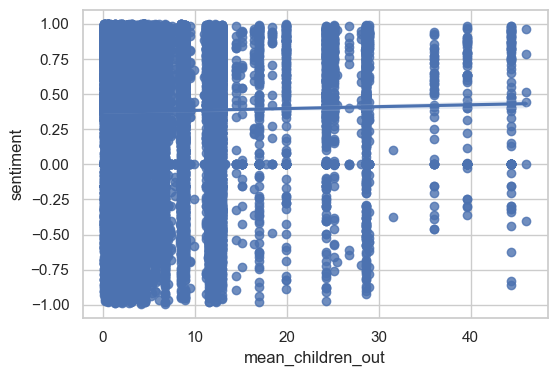

In [57]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_children_out, fit_reg=True);

In [58]:
df[["sentiment", "mean_children_out"]].corr()

sentiment  mean_children_out
sentiment           1.000000           0.013676
mean_children_out   0.013676           1.000000

In [59]:
results = smf.ols("sentiment ~ mean_children_out", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          0.000000  0.370855
mean_children_out  0.000294  0.001325

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small **positive** correlation but high significance.

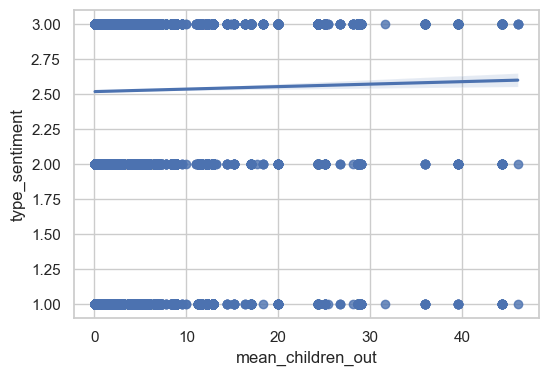

In [60]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_children_out, fit_reg=True);

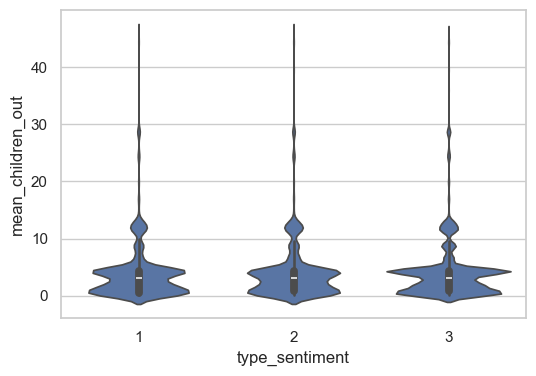

In [61]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_children_out);

In [62]:
group1 = df[["mean_children_out"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_children_out"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_children_out"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([5.35107925]), array([0.00474497]))

In [63]:
results = smf.mnlogit("type_sentiment ~ mean_children_out", data = df[["type_sentiment", "mean_children_out"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")

Optimization terminated successfully.
         Current function value: 0.855512
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                                  
Intercept             3.331423e-13          0.000000        0.127237   
mean_children_out     2.123259e-02          0.001081        0.006530   

                   params_positive  
index                               
Intercept                 1.470818  
mean_children_out         0.007614

In [64]:
results = smf.ols("type_sentiment ~ mean_children_out", data = df[["type_sentiment", "mean_children_out"]]).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          0.00000  2.516979
mean_children_out  0.00226  0.001776

## Discourse as emotionality
Low **negative** corr, but high significance.

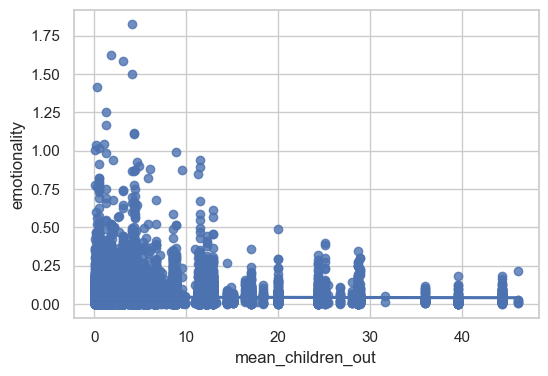

In [65]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_children_out, fit_reg=True);

In [66]:
df[["emotionality", "mean_children_out"]].corr()

emotionality  mean_children_out
emotionality           1.000000          -0.006846
mean_children_out     -0.006846           1.000000

In [67]:
results = smf.ols("emotionality ~ mean_children_out", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          0.000000  0.044827
mean_children_out  0.069918 -0.000080

# Discourse by mean_ed_exp

## Discourse as sentiment
Low negative corr, but high significance.

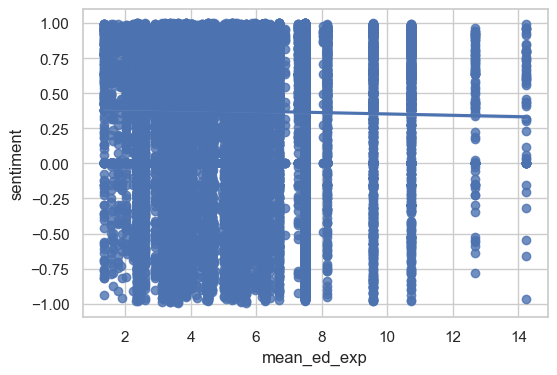

In [68]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_ed_exp, fit_reg=True);

In [69]:
df[["sentiment", "mean_ed_exp"]].corr()

sentiment  mean_ed_exp
sentiment     1.000000    -0.019516
mean_ed_exp  -0.019516     1.000000

In [70]:
results = smf.ols("sentiment ~ mean_ed_exp", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept    0.000000e+00  0.400664
mean_ed_exp  2.319145e-07 -0.004844

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

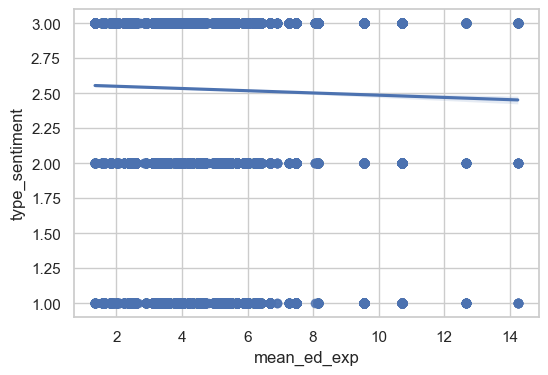

In [71]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_ed_exp, fit_reg=True);

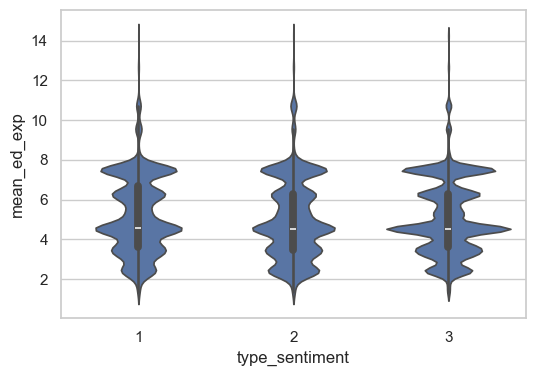

In [72]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_ed_exp);

In [73]:
group1 = df[["mean_ed_exp"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_ed_exp"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_ed_exp"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([42.01341357]), array([5.81722783e-19]))

In [74]:
results = smf.mnlogit("type_sentiment ~ mean_ed_exp", data = df[["type_sentiment", "mean_ed_exp"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.855300
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                            
Intercept       8.744199e-35      0.000000e+00        0.472653   
mean_ed_exp     6.515904e-19      8.507200e-14       -0.062454   

             params_positive  
index                         
Intercept           1.717123  
mean_ed_exp        -0.042062

## Discourse as emotionality
Low **positive** corr, but high significance.

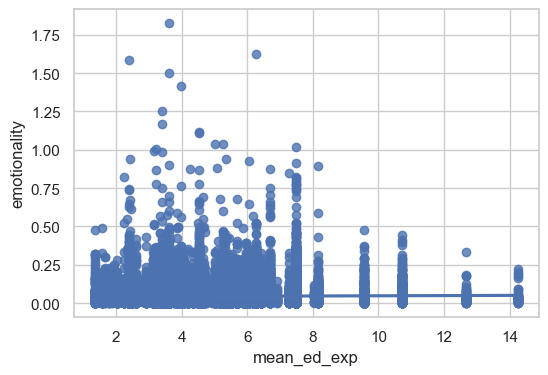

In [75]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_ed_exp, fit_reg=True);

In [76]:
df[["emotionality", "mean_ed_exp"]].corr()

emotionality  mean_ed_exp
emotionality      1.000000     0.021938
mean_ed_exp       0.021938     1.000000

In [77]:
results = smf.ols("emotionality ~ mean_ed_exp", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept    0.000000e+00  0.041157
mean_ed_exp  6.108558e-09  0.000654

# Discourse by mean_literacy

## Discourse as sentiment
Low negative corr, but high significance.

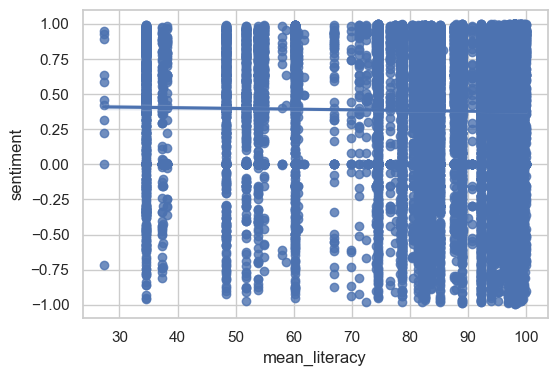

In [78]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_literacy, fit_reg=True);

In [79]:
df[["sentiment", "mean_literacy"]].corr()

sentiment  mean_literacy
sentiment       1.000000      -0.011916
mean_literacy  -0.011916       1.000000

In [80]:
results = smf.ols("sentiment ~ mean_literacy", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept      2.582893e-180  0.422491
mean_literacy   1.606875e-03 -0.000491

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative/positive correlation but significant.

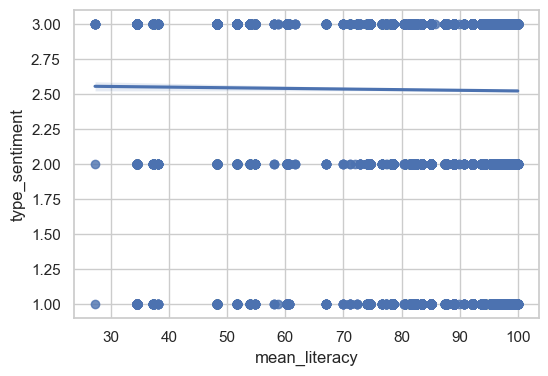

In [81]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_literacy, fit_reg=True);

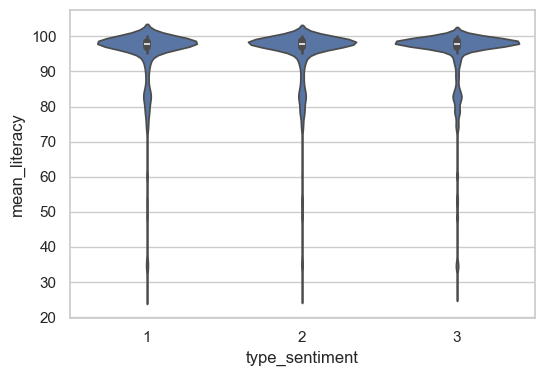

In [82]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_literacy);

In [83]:
group1 = df[["mean_literacy"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_literacy"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_literacy"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([5.39018243]), array([0.00456303]))

In [84]:
results = smf.mnlogit("type_sentiment ~ mean_literacy", data = df[["type_sentiment", "mean_literacy"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# Not continuous (coef is positive for neutral, and negative for positive sentiment type)

Optimization terminated successfully.
         Current function value: 0.855289
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                              
Intercept             0.623651      1.005038e-68       -0.055790   
mean_literacy         0.063994      3.977891e-01        0.002225   

               params_positive  
index                           
Intercept             1.577737  
mean_literacy        -0.000806

## Discourse as emotionality
Low negative corr, but high significance.

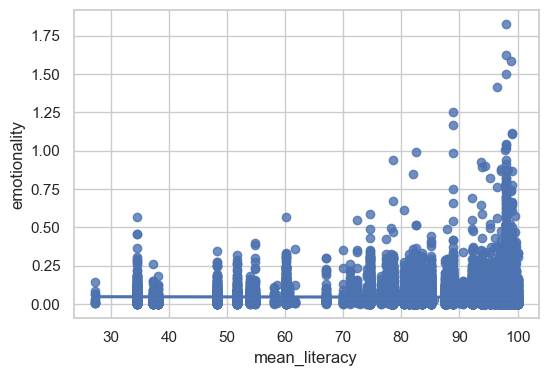

In [85]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_literacy, fit_reg=True);

In [86]:
df[["emotionality", "mean_literacy"]].corr()

emotionality  mean_literacy
emotionality       1.000000      -0.009588
mean_literacy     -0.009588       1.000000

In [87]:
results = smf.ols("emotionality ~ mean_literacy", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept      5.241061e-168  0.048913
mean_literacy   1.114636e-02 -0.000047

# Discourse by mean_ARV_coverage

## Discourse as sentiment
Low negative corr, but high significance.

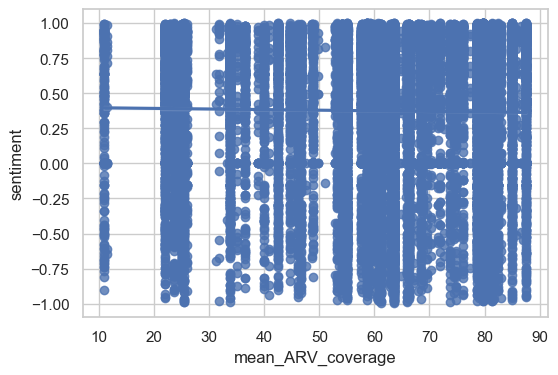

In [88]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_ARV_coverage, fit_reg=True);

In [89]:
df[["sentiment", "mean_ARV_coverage"]].corr()

sentiment  mean_ARV_coverage
sentiment           1.000000          -0.015532
mean_ARV_coverage  -0.015532           1.000000

In [90]:
results = smf.ols("sentiment ~ mean_ARV_coverage", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          0.000000  0.400196
mean_ARV_coverage  0.000211 -0.000426

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

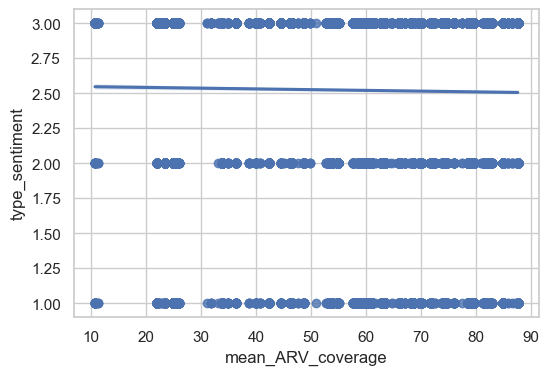

In [91]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_ARV_coverage, fit_reg=True);

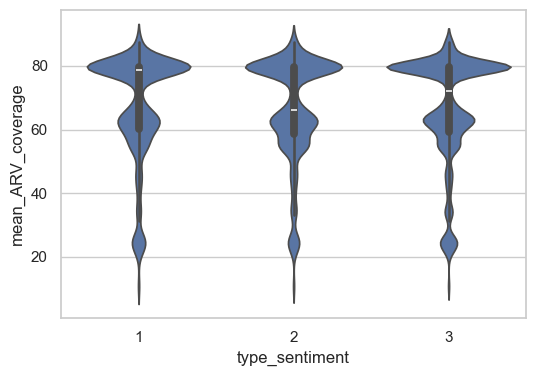

In [92]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_ARV_coverage);

In [93]:
group1 = df[["mean_ARV_coverage"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_ARV_coverage"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_ARV_coverage"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([5.91826449]), array([0.00269152]))

In [94]:
results = smf.mnlogit("type_sentiment ~ mean_ARV_coverage", data = df[["type_sentiment", "mean_ARV_coverage"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.865039
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                                  
Intercept             1.633482e-08     2.514601e-245        0.335666   
mean_ARV_coverage     4.471180e-03      8.141096e-04       -0.002453   

                   params_positive  
index                               
Intercept                 1.638372  
mean_ARV_coverage        -0.002375

## Discourse as emotionality
Low negative corr, but high significance.

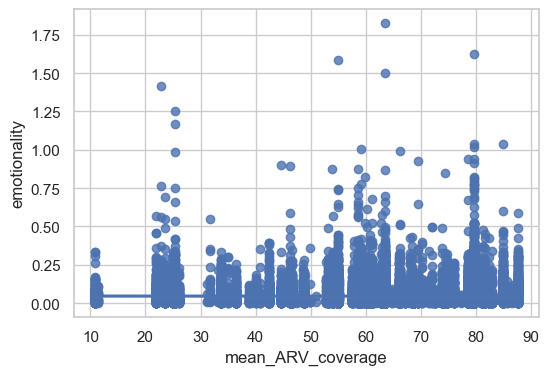

In [95]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_ARV_coverage, fit_reg=True);

In [96]:
df[["emotionality", "mean_ARV_coverage"]].corr()

emotionality  mean_ARV_coverage
emotionality           1.000000          -0.004111
mean_ARV_coverage     -0.004111           1.000000

In [97]:
results = smf.ols("emotionality ~ mean_ARV_coverage", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          0.000000  0.046041
mean_ARV_coverage  0.326746 -0.000014

# Discourse by mean_health_exp

## Discourse as sentiment
Low negative corr, but high significance.

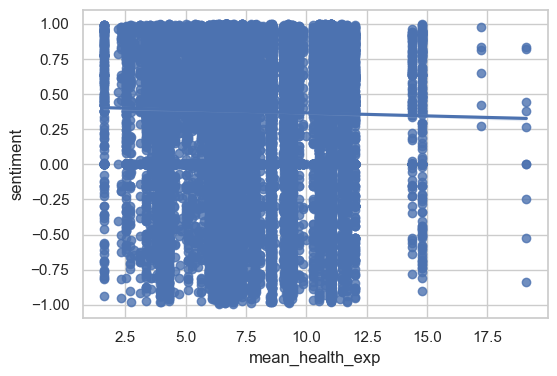

In [98]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_health_exp, fit_reg=True);

In [99]:
df[["sentiment", "mean_health_exp"]].corr()

sentiment  mean_health_exp
sentiment         1.000000        -0.022116
mean_health_exp  -0.022116         1.000000

In [100]:
results = smf.ols("sentiment ~ mean_health_exp", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept        0.000000e+00  0.410742
mean_health_exp  4.661136e-09 -0.004398

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

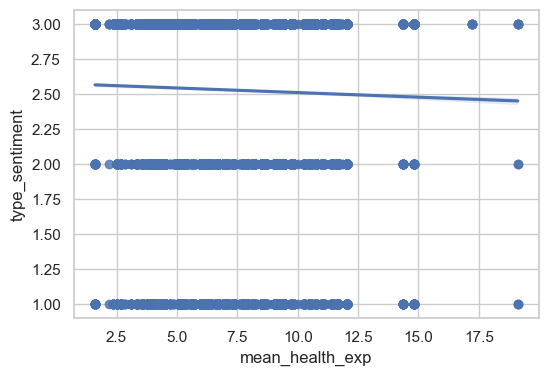

In [101]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_health_exp, fit_reg=True);

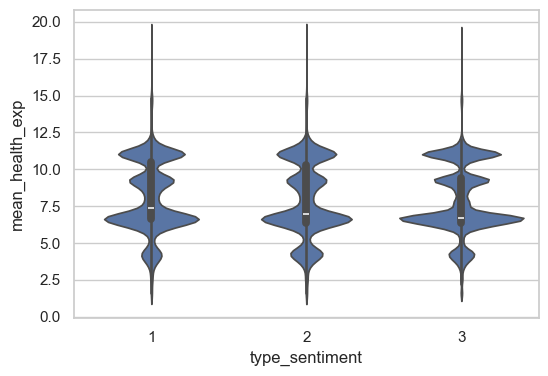

In [102]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_health_exp);

In [103]:
group1 = df[["mean_health_exp"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_health_exp"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_health_exp"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([29.23383246]), array([2.03795761e-13]))

In [104]:
results = smf.mnlogit("type_sentiment ~ mean_health_exp", data = df[["type_sentiment", "mean_health_exp"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.855521
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                                
Intercept           1.680509e-23      0.000000e+00        0.467997   
mean_health_exp     2.465177e-12      4.439615e-12       -0.039614   

                 params_positive  
index                             
Intercept               1.752868  
mean_health_exp        -0.031719

## Discourse as emotionality
Low **positive** corr, but high significance.

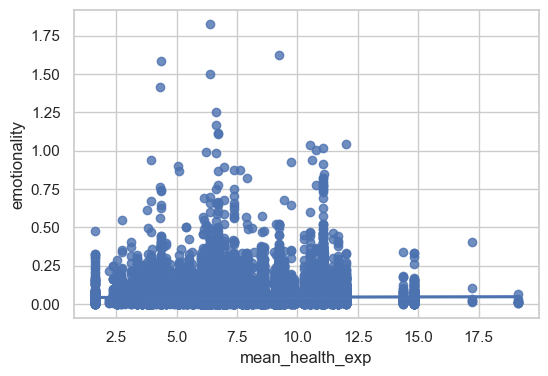

In [105]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_health_exp, fit_reg=True);

In [106]:
df[["emotionality", "mean_health_exp"]].corr()

emotionality  mean_health_exp
emotionality          1.00000          0.01158
mean_health_exp       0.01158          1.00000

In [107]:
results = smf.ols("emotionality ~ mean_health_exp", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept        0.000000  0.042306
mean_health_exp  0.002159  0.000276

# Discourse by mean_UHC_coverage

## Discourse as sentiment
Low negative corr, but high significance.

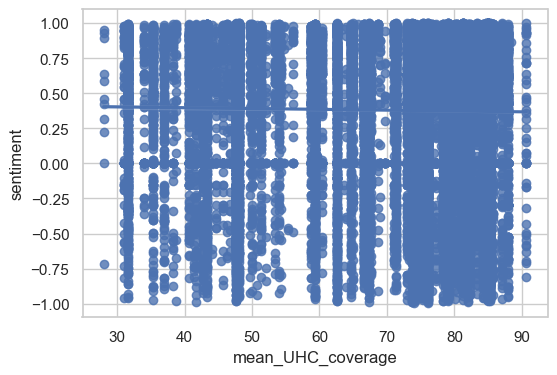

In [108]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_UHC_coverage, fit_reg=True);

In [109]:
df[["sentiment", "mean_UHC_coverage"]].corr()

sentiment  mean_UHC_coverage
sentiment           1.000000          -0.016039
mean_UHC_coverage  -0.016039           1.000000

In [110]:
results = smf.ols("sentiment ~ mean_UHC_coverage", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          0.000000  0.420344
mean_UHC_coverage  0.000021 -0.000589

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

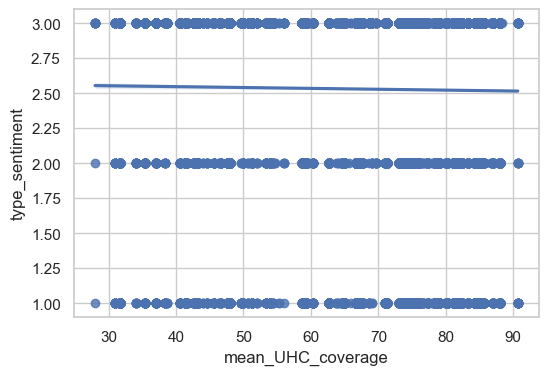

In [111]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_UHC_coverage, fit_reg=True);

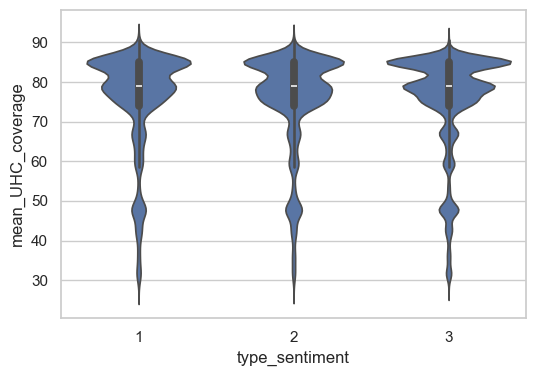

In [112]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_UHC_coverage);

In [113]:
group1 = df[["mean_UHC_coverage"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_UHC_coverage"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_UHC_coverage"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([4.53801903]), array([0.01069771]))

In [114]:
results = smf.mnlogit("type_sentiment ~ mean_UHC_coverage", data = df[["type_sentiment", "mean_UHC_coverage"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")

Optimization terminated successfully.
         Current function value: 0.855916
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                                  
Intercept                 0.000080     2.728209e-145        0.319026   
mean_UHC_coverage         0.037995      2.601354e-03       -0.002195   

                   params_positive  
index                               
Intercept                 1.696254  
mean_UHC_coverage        -0.002600

In [115]:
results = smf.ols("type_sentiment ~ mean_UHC_coverage", data = df[["type_sentiment", "mean_UHC_coverage"]]).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          0.000000  2.570675
mean_UHC_coverage  0.004755 -0.000622

## Discourse as emotionality
Low negative corr, **NOT significant**.

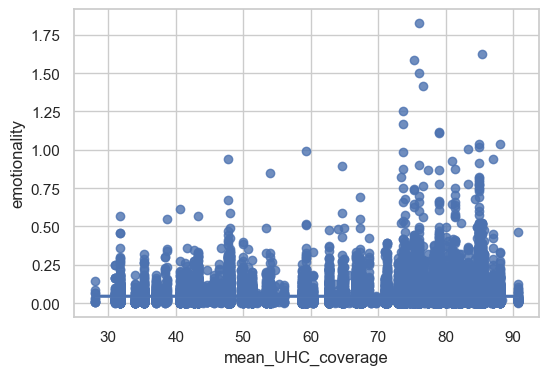

In [116]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_UHC_coverage, fit_reg=True);

In [117]:
df[["emotionality", "mean_UHC_coverage"]].corr()

emotionality  mean_UHC_coverage
emotionality           1.000000          -0.001474
mean_UHC_coverage     -0.001474           1.000000

In [118]:
results = smf.ols("emotionality ~ mean_UHC_coverage", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept          1.706151e-272  0.044976
mean_UHC_coverage   6.962483e-01 -0.000006

# Discourse by mean_rights

## Discourse as sentiment
Low negative corr, but high significance.

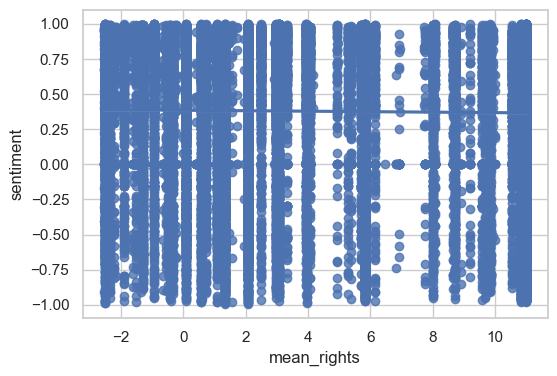

In [119]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_rights, fit_reg=True);

In [120]:
df[["sentiment", "mean_rights"]].corr()

sentiment  mean_rights
sentiment     1.000000    -0.016764
mean_rights  -0.016764     1.000000

In [121]:
results = smf.ols("sentiment ~ mean_rights", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept    0.000000  0.385169
mean_rights  0.000009 -0.001712

## Discourse as type_sentiment
Considering it as continuous or as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_rights, fit_reg=True);

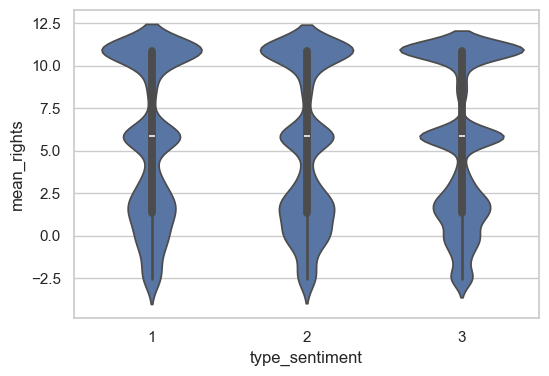

In [122]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_rights);

In [123]:
group1 = df[["mean_rights"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_rights"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_rights"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([19.8551036]), array([2.39594551e-09]))

In [124]:
results = smf.mnlogit("type_sentiment ~ mean_rights", data = df[["type_sentiment", "mean_rights"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.855698
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                            
Intercept       2.215670e-34          0.000000        0.251551   
mean_rights     3.905010e-10          0.000003       -0.018186   

             params_positive  
index                         
Intercept           1.560736  
mean_rights        -0.011065

## Discourse as emotionality
Low **positive** corr, but high significance.

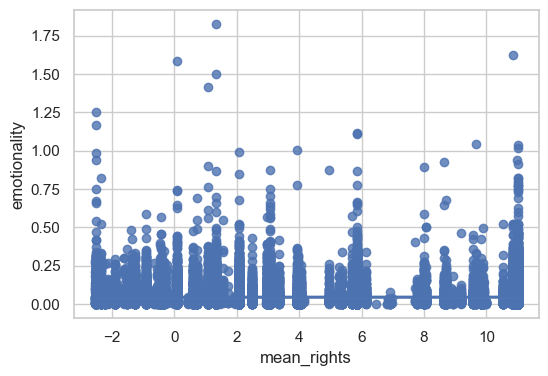

In [125]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_rights, fit_reg=True);

In [126]:
df[["emotionality", "mean_rights"]].corr()

emotionality  mean_rights
emotionality      1.000000     0.002626
mean_rights       0.002626     1.000000

In [127]:
results = smf.ols("emotionality ~ mean_rights", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept    0.000000  0.044315
mean_rights  0.486615  0.000032

# Discourse by mean_sex_index

## Discourse as sentiment
Low **positive** corr, but high significance.

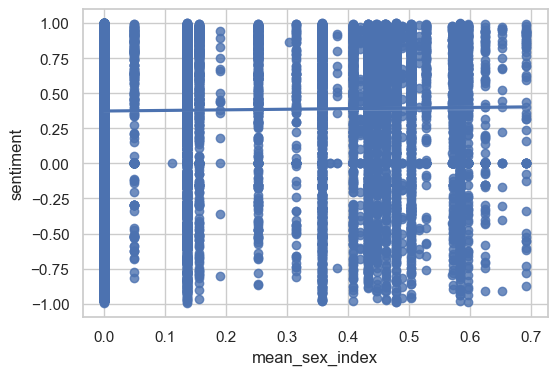

In [128]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_sex_index, fit_reg=True);

In [129]:
df[["sentiment", "mean_sex_index"]].corr()

sentiment  mean_sex_index
sentiment         1.00000         0.01474
mean_sex_index    0.01474         1.00000

In [130]:
results = smf.ols("sentiment ~ mean_sex_index", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept       0.000000  0.372909
mean_sex_index  0.000094  0.042458

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation but high significance.

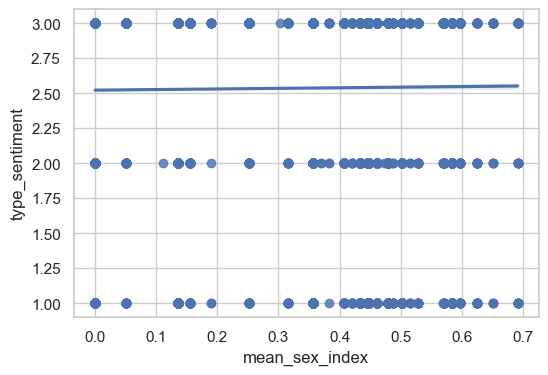

In [131]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_sex_index, fit_reg=True);

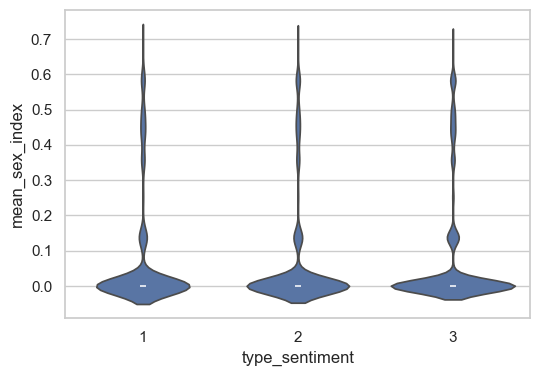

In [132]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_sex_index);

In [133]:
group1 = df[["mean_sex_index"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_sex_index"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_sex_index"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([13.28004108]), array([1.71254748e-06]))

In [134]:
results = smf.mnlogit("type_sentiment ~ mean_sex_index", data = df[["type_sentiment", "mean_sex_index"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# Not continuous

Optimization terminated successfully.
         Current function value: 0.855787
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                               
Intercept          9.174747e-33          0.000000        0.172738   
mean_sex_index     9.163150e-04          0.398552       -0.277489   

                params_positive  
index                            
Intercept              1.496130  
mean_sex_index         0.055918

## Discourse as emotionality
Low **positive** corr, but high significance.

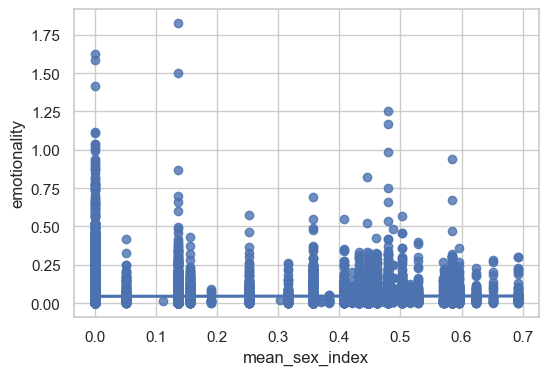

In [135]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_sex_index, fit_reg=True);

In [136]:
df[["emotionality", "mean_sex_index"]].corr()

emotionality  mean_sex_index
emotionality        1.000000        0.008396
mean_sex_index      0.008396        1.000000

In [137]:
results = smf.ols("emotionality ~ mean_sex_index", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept       0.000000  0.044276
mean_sex_index  0.026142  0.002900

# Discourse by mean_hate_protection

## Discourse as sentiment
Low negative corr, **NOT significant**

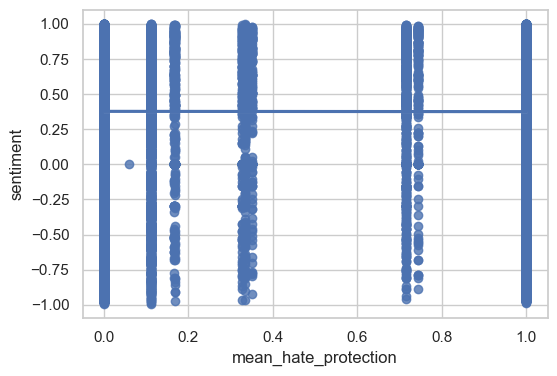

In [138]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.sentiment, x= df.mean_hate_protection, fit_reg=True);

In [139]:
df[["sentiment", "mean_hate_protection"]].corr()

sentiment  mean_hate_protection
sentiment              1.000000             -0.002116
mean_hate_protection  -0.002116              1.000000

In [140]:
results = smf.ols("sentiment ~ mean_hate_protection", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept             0.000000  0.377141
mean_hate_protection  0.575047 -0.002048

## Discourse as type_sentiment
Considering it as categorical (ANOVA and Multinomial Logistic Regression) it also shows a small negative correlation, **NOT significant for positive sentiment**.

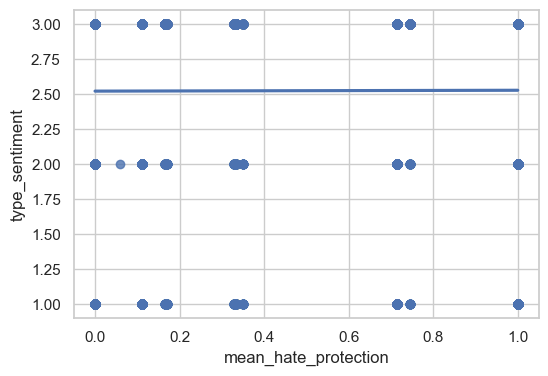

In [141]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.type_sentiment, x= df.mean_hate_protection, fit_reg=True);

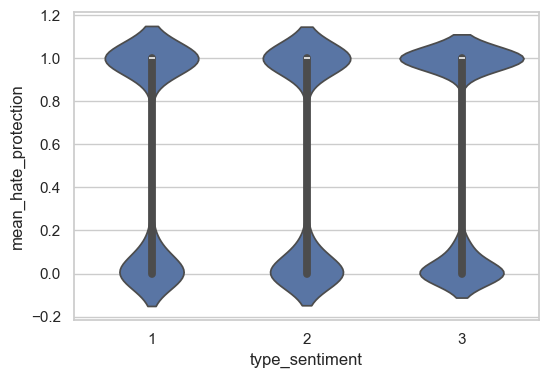

In [142]:
plt.figure(figsize=(6, 4))
sns.violinplot(x = df.type_sentiment, y= df.mean_hate_protection);

In [143]:
group1 = df[["mean_hate_protection"]][df["type_sentiment"] == 1].dropna()
group2 = df[["mean_hate_protection"]][df["type_sentiment"] == 2].dropna()
group3 = df[["mean_hate_protection"]][df["type_sentiment"] == 3].dropna()
f_statistic, p_value = f_oneway(group1, group2, group3)
f_statistic, p_value

(array([32.41213386]), array([8.51308095e-15]))

In [144]:
results = smf.mnlogit("type_sentiment ~ mean_hate_protection", data = df[["type_sentiment", "mean_hate_protection"]]).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# Not continuous (coef is still negative, but less negative, when increasing the type (going from neutral to positive))

Optimization terminated successfully.
         Current function value: 0.855521
         Iterations 5


pvalues_neutral  pvalues_positive  params_neutral  \
index                                                                     
Intercept                1.297022e-37          0.000000        0.258694   
mean_hate_protection     3.753900e-12          0.108806       -0.191011   

                      params_positive  
index                                  
Intercept                    1.520672  
mean_hate_protection        -0.035903

## Discourse as emotionality
Low negative corr, **NOT significant**.

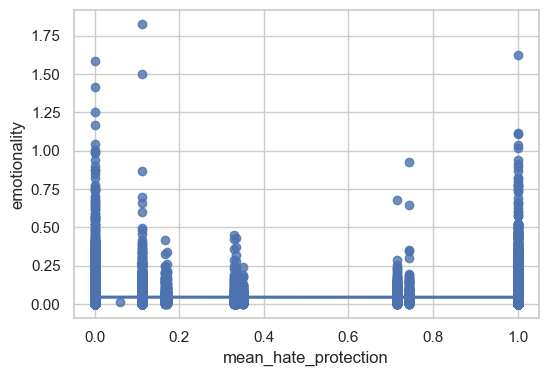

In [145]:
plt.figure(figsize=(6, 4))
sns.regplot(y = df.emotionality, x= df.mean_hate_protection, fit_reg=True);

In [146]:
df[["emotionality", "mean_hate_protection"]].corr()

emotionality  mean_hate_protection
emotionality               1.00000              -0.00565
mean_hate_protection      -0.00565               1.00000

In [147]:
results = smf.ols("emotionality ~ mean_hate_protection", data = df).fit()
pd.DataFrame([results.pvalues, results.params]).transpose().rename(columns={0:"pvalues", 1: "coef"})

pvalues      coef
Intercept             0.000000  0.044854
mean_hate_protection  0.134443 -0.000656

# Discourse by region

In [148]:
df.region.value_counts()

region
North America                 82666
Europe & Central Asia         37780
East Asia & Pacific           12137
Latin America & Caribbean      3862
Middle East & North Africa     2821
South Asia                     1199
Sub-Saharan Africa              559
Name: count, dtype: int64

In [149]:
onehotencoder = preprocessing.OneHotEncoder()
regions_categ = onehotencoder.fit_transform(df[["region"]].dropna(subset="region")).toarray()
encoded_df = pd.DataFrame(regions_categ, columns=onehotencoder.get_feature_names_out(["region"]))
df_regioncateg = pd.concat([df.dropna(subset="region"), encoded_df], axis=1)
df_regioncateg.drop("region", axis=1, inplace=True)
df_regioncateg

id_web        lat       long  \
0          1.0  45.524600 -73.604493   
1          2.0  45.514617 -73.575139   
2          3.0  45.525991 -73.603195   
3          4.0  45.525713 -73.603528   
4          5.0  45.460612 -73.504457   
...        ...        ...        ...   
140878     NaN        NaN        NaN   
140908     NaN        NaN        NaN   
140962     NaN        NaN        NaN   
140974     NaN        NaN        NaN   
141016     NaN        NaN        NaN   

                                                  comment language  sentiment  \
0       The place we will meet to describe our ruminat...       en    -0.2960   
1       10 Pines, as anglos call it, has the first mem...       en     0.8979   
2         this used to be a queer spot that I liked a lot       en     0.4215   
3       we argued about the best way to deal with  tho...       en     0.9091   
4       A riverside sunset gay/queer frolic took place...       en     0.3612   
...                                                   ...      ...        ...   
140878                                                NaN      NaN        NaN   
140908                                                NaN      NaN        NaN   
140962                                                NaN      NaN        NaN   
140974                                                NaN      NaN        NaN   
141016                                                NaN      NaN        NaN   

        type_sentiment  characters  emotionality country_name country_code  \
0                  1.0       173.0      0.039564       Canada          CAN   
1                  3.0       508.0      0.170131       Canada          CAN   
2                  3.0        47.0      0.011789       Canada          CAN   
3                  3.0       250.0      0.084220       Canada          CAN   
4                  3.0        93.0      0.022338       Canada          CAN   
...                ...         ...           ...          ...          ...   
140878             NaN         NaN           NaN          NaN          NaN   
140908             NaN         NaN           NaN          NaN          NaN   
140962             NaN         NaN           NaN          NaN          NaN   
140974             NaN         NaN           NaN          NaN          NaN   
141016             NaN         NaN           NaN          NaN          NaN   

       income_group  mean_stability   mean_law  mean_female_seats  mean_voice  \
0       High income       81.415844  96.279575          46.227316   97.903451   
1       High income       81.415844  96.279575          46.227316   97.903451   
2       High income       81.415844  96.279575          46.227316   97.903451   
3       High income       81.415844  96.279575          46.227316   97.903451   
4       High income       81.415844  96.279575          46.227316   97.903451   
...             ...             ...        ...                ...         ...   
140878          NaN             NaN        NaN                NaN         NaN   
140908          NaN             NaN        NaN                NaN         NaN   
140962          NaN             NaN        NaN                NaN         NaN   
140974          NaN             NaN        NaN                NaN         NaN   
141016          NaN             NaN        NaN                NaN         NaN   

            mean_gdp  mean_children_out  mean_ed_exp  mean_literacy  \
0       5.667005e+11            0.51473      7.49075      97.943596   
1       5.667005e+11            0.51473      7.49075      97.943596   
2       5.667005e+11            0.51473      7.49075      97.943596   
3       5.667005e+11            0.51473      7.49075      97.943596   
4       5.667005e+11            0.51473      7.49075      97.943596   
...              ...                ...          ...            ...   
140878           NaN                NaN          NaN            NaN   
140908           NaN                NaN          NaN            NaN   
14096

## Discourse as sentiment

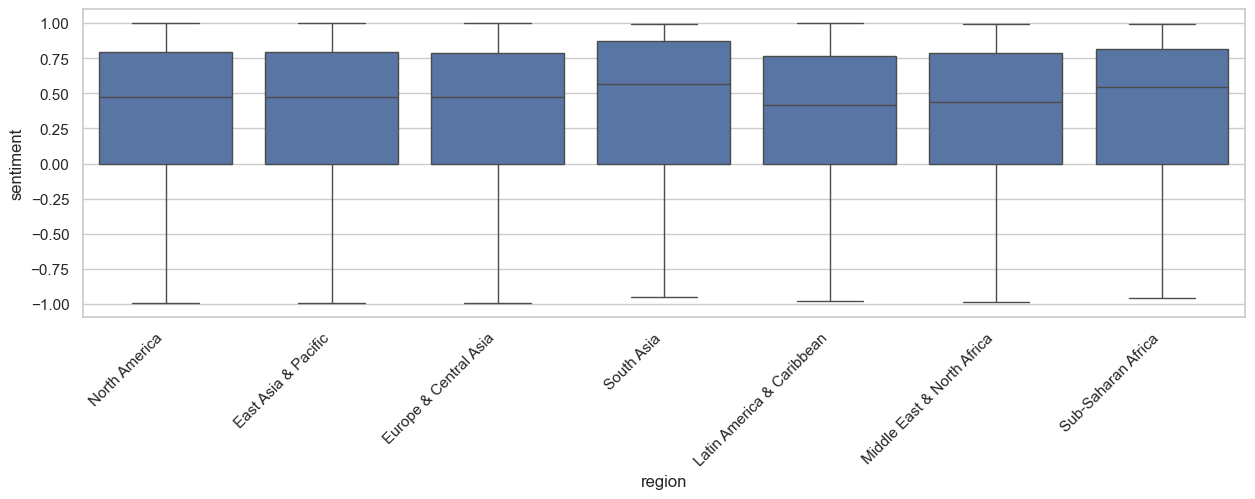

In [150]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.sentiment, x= df.region)
plt.xticks(rotation=45, ha="right");

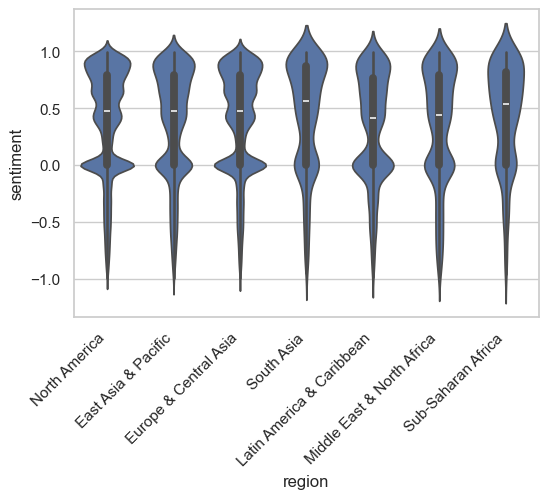

In [151]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.sentiment, x= df.region)
plt.xticks(rotation=45, ha="right");

In [201]:
results = smf.ols("sentiment ~ df_regioncateg['region_Europe & Central Asia'] + df_regioncateg['region_Latin America & Caribbean'] + df_regioncateg['region_Middle East & North Africa'] + df_regioncateg['region_North America'] + df_regioncateg['region_South Asia'] + df_regioncateg['region_Sub-Saharan Africa']", data = df_regioncateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")
# region_East Asia & Pacific -> reference category
# region_Europe & Central Asia
# region_Latin America & Caribbean
# region_Middle East & North Africa
# region_North America
# region_South Asia
# region_Sub-Saharan Africa

pvalues    params
index                                                                 
Intercept                                           0.000000  0.375008
df_regioncateg['region_Europe & Central Asia']      0.053812  0.009652
df_regioncateg['region_Latin America & Caribbean']  0.102969  0.014457
df_regioncateg['region_Middle East & North Afri...  0.578289  0.005599
df_regioncateg['region_North America']              0.769441 -0.001366
df_regioncateg['region_South Asia']                 0.723594 -0.005134
df_regioncateg['region_Sub-Saharan Africa']         0.411084  0.017213

## Discourse as type_sentiment

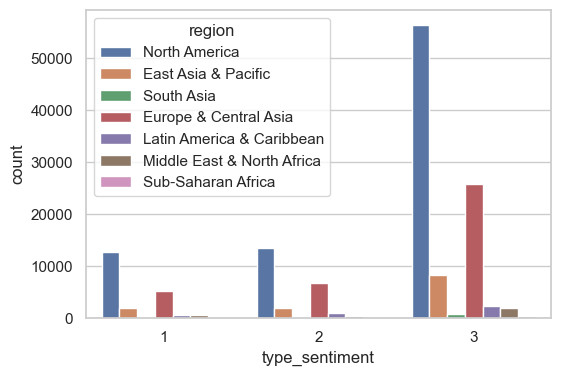

In [153]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type_sentiment', hue='region', data=df);

In [154]:
results = smf.mnlogit("type_sentiment ~ df_regioncateg['region_Europe & Central Asia'] + df_regioncateg['region_Latin America & Caribbean'] + df_regioncateg['region_Middle East & North Africa'] + df_regioncateg['region_North America'] + df_regioncateg['region_South Asia'] + df_regioncateg['region_Sub-Saharan Africa']", data = df_regioncateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# region_East Asia & Pacific -> reference category
# region_Europe & Central Asia
# region_Latin America & Caribbean
# region_Middle East & North Africa
# region_North America
# region_South Asia
# region_Sub-Saharan Africa

Optimization terminated successfully.
         Current function value: 0.850955
         Iterations 5


pvalues_neutral  \
index                                                                 
Intercept                                                  0.000054   
df_regioncateg['region_Europe & Central Asia']             0.399066   
df_regioncateg['region_Latin America & Caribbean']         0.111803   
df_regioncateg['region_Middle East & North Afri...         0.368327   
df_regioncateg['region_North America']                     0.798908   
df_regioncateg['region_South Asia']                        0.254695   
df_regioncateg['region_Sub-Saharan Africa']                0.809424   

                                                    pvalues_positive  \
index                                                                  
Intercept                                                   0.000000   
df_regioncateg['region_Europe & Central Asia']              0.207893   
df_regioncateg['region_Latin America & Caribbean']          0.024848   
df_regioncateg['region_Middle East & North Afri...          0.814719   
df_regioncateg['region_North America']                      0.776876   
df_regioncateg['region_South Asia']                         0.148109   
df_regioncateg['region_Sub-Saharan Africa']                 0.634152   

                                                    params_neutral  \
index                                                                
Intercept                                                 0.132527   
df_regioncateg['region_Europe & Central Asia']           -0.031950   
df_regioncateg['region_Latin America & Caribbean']        0.108492   
df_regioncateg['region_Middle East & North Afri...       -0.068600   
df_regioncateg['region_North America']                    0.008950   
df_regioncateg['region_South Asia']                      -0.122110   
df_regioncateg['region_Sub-Saharan Africa']               0.038621   

                                                    params_positive  
index                                                                
Intercept                                                  1.487170  
df_regioncateg['region_Europe & Central Asia']             0.038468  
df_regioncateg['region_Latin America & Caribbean']         0.125070  
df_regioncateg['region_Middle East & North Afri...        -0.014272  
df_regioncateg['region_North America']                     0.008050  
df_regioncateg['region_South Asia']                       -0.123378  
df_regioncateg['region_Sub-Saharan Africa']                0.061810

## Discourse as emotionality

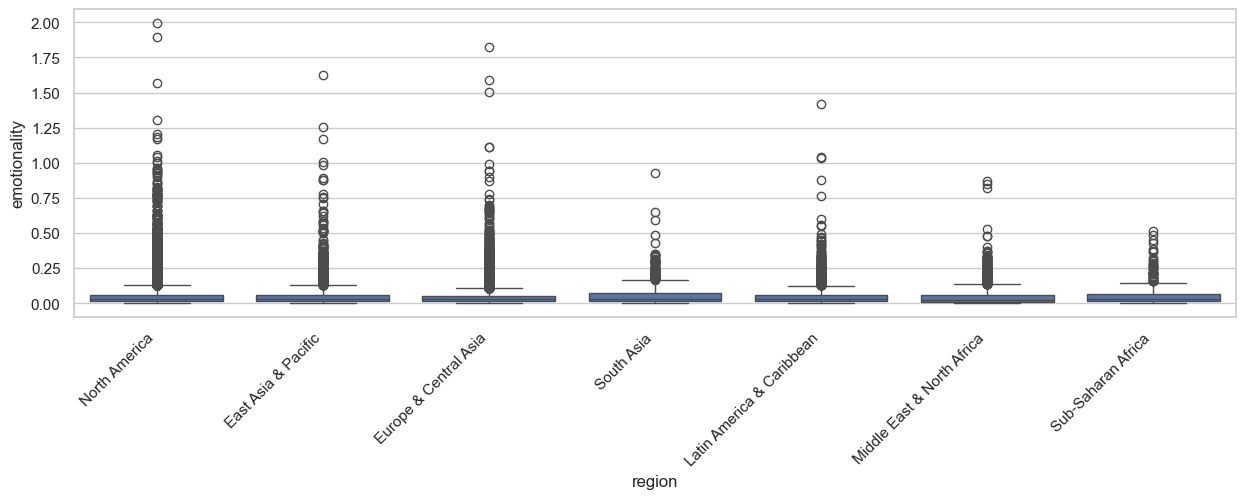

In [155]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.emotionality, x= df.region)
plt.xticks(rotation=45, ha="right");

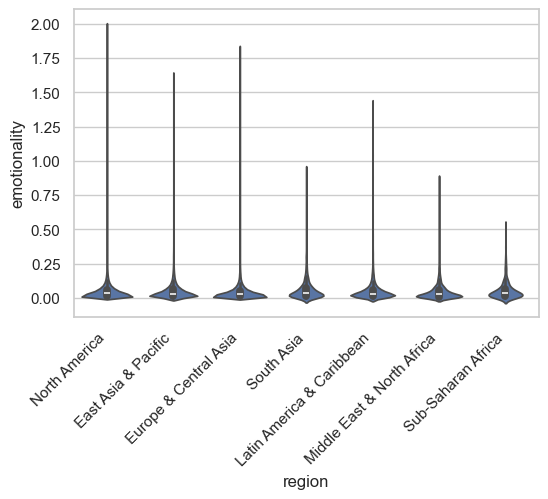

In [156]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.emotionality, x= df.region)
plt.xticks(rotation=45, ha="right");

In [157]:
results = smf.ols("emotionality ~ df_regioncateg['region_Europe & Central Asia'] + df_regioncateg['region_Latin America & Caribbean'] + df_regioncateg['region_Middle East & North Africa'] + df_regioncateg['region_North America'] + df_regioncateg['region_South Asia'] + df_regioncateg['region_Sub-Saharan Africa']", data = df_regioncateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")
# region_East Asia & Pacific -> reference category
# region_Europe & Central Asia
# region_Latin America & Caribbean
# region_Middle East & North Africa
# region_North America
# region_South Asia
# region_Sub-Saharan Africa

pvalues    params
index                                                                 
Intercept                                           0.000000  0.046015
df_regioncateg['region_Europe & Central Asia']      0.877080  0.000090
df_regioncateg['region_Latin America & Caribbean']  0.791358 -0.000274
df_regioncateg['region_Middle East & North Afri...  0.000247  0.004308
df_regioncateg['region_North America']              0.004599 -0.001541
df_regioncateg['region_South Asia']                 0.168310  0.002333
df_regioncateg['region_Sub-Saharan Africa']         0.063408  0.004535

# Discourse by income_group

## Discourse as sentiment


In [158]:
df.income_group.value_counts()

income_group
High income            128223
Upper middle income      8814
Lower middle income      3777
Low income                210
Name: count, dtype: int64

In [159]:
onehotencoder = preprocessing.OneHotEncoder()
income_categ = onehotencoder.fit_transform(df[["income_group"]].dropna(subset="income_group")).toarray()
encoded_df = pd.DataFrame(income_categ, columns=onehotencoder.get_feature_names_out(["income_group"]))
df_incomecateg = pd.concat([df.dropna(subset="income_group"), encoded_df], axis=1)
df_incomecateg.drop("income_group", axis=1, inplace=True)
df_incomecateg

id_web        lat       long  \
0          1.0  45.524600 -73.604493   
1          2.0  45.514617 -73.575139   
2          3.0  45.525991 -73.603195   
3          4.0  45.525713 -73.603528   
4          5.0  45.460612 -73.504457   
...        ...        ...        ...   
140878     NaN        NaN        NaN   
140908     NaN        NaN        NaN   
140962     NaN        NaN        NaN   
140974     NaN        NaN        NaN   
141016     NaN        NaN        NaN   

                                                  comment language  sentiment  \
0       The place we will meet to describe our ruminat...       en    -0.2960   
1       10 Pines, as anglos call it, has the first mem...       en     0.8979   
2         this used to be a queer spot that I liked a lot       en     0.4215   
3       we argued about the best way to deal with  tho...       en     0.9091   
4       A riverside sunset gay/queer frolic took place...       en     0.3612   
...                                                   ...      ...        ...   
140878                                                NaN      NaN        NaN   
140908                                                NaN      NaN        NaN   
140962                                                NaN      NaN        NaN   
140974                                                NaN      NaN        NaN   
141016                                                NaN      NaN        NaN   

        type_sentiment  characters  emotionality country_name country_code  \
0                  1.0       173.0      0.039564       Canada          CAN   
1                  3.0       508.0      0.170131       Canada          CAN   
2                  3.0        47.0      0.011789       Canada          CAN   
3                  3.0       250.0      0.084220       Canada          CAN   
4                  3.0        93.0      0.022338       Canada          CAN   
...                ...         ...           ...          ...          ...   
140878             NaN         NaN           NaN          NaN          NaN   
140908             NaN         NaN           NaN          NaN          NaN   
140962             NaN         NaN           NaN          NaN          NaN   
140974             NaN         NaN           NaN          NaN          NaN   
141016             NaN         NaN           NaN          NaN          NaN   

               region  mean_stability   mean_law  mean_female_seats  \
0       North America       81.415844  96.279575          46.227316   
1       North America       81.415844  96.279575          46.227316   
2       North America       81.415844  96.279575          46.227316   
3       North America       81.415844  96.279575          46.227316   
4       North America       81.415844  96.279575          46.227316   
...               ...             ...        ...                ...   
140878            NaN             NaN        NaN                NaN   
140908            NaN             NaN        NaN                NaN   
140962            NaN             NaN        NaN                NaN   
140974            NaN             NaN        NaN                NaN   
141016            NaN             NaN        NaN                NaN   

        mean_voice      mean_gdp  mean_children_out  mean_ed_exp  \
0        97.903451  5.667005e+11            0.51473      7.49075   
1        97.903451  5.667005e+11            0.51473      7.49075   
2        97.903451  5.667005e+11            0.51473      7.49075   
3        97.903451  5.667005e+11            0.51473      7.49075   
4        97.903451  5.667005e+11            0.51473      7.49075   
...            ...           ...                ...          ...   
140878         NaN           NaN                NaN          NaN   
140908         NaN           NaN                NaN          NaN   
140962         NaN           NaN                NaN          NaN   
140974         NaN           NaN                NaN          NaN   
141016         N

## Discourse as sentiment

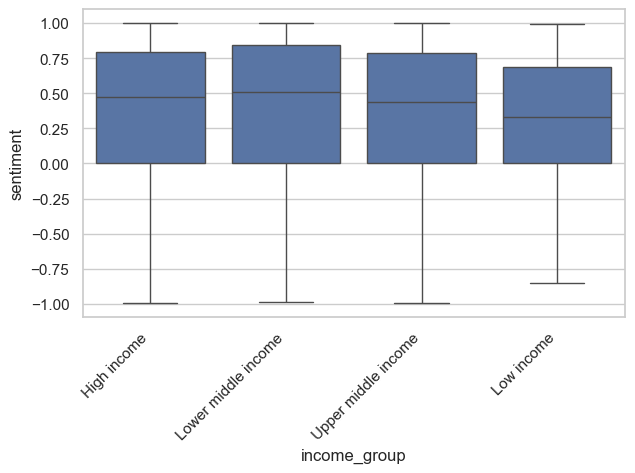

In [160]:
plt.figure(figsize=(7, 4))
sns.boxplot(y = df.sentiment, x= df.income_group)
plt.xticks(rotation=45, ha="right");

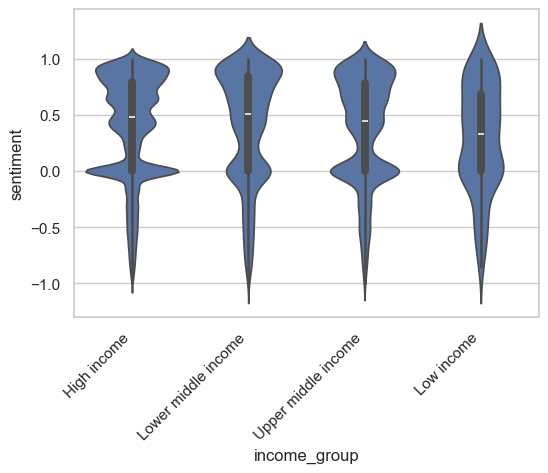

In [161]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.sentiment, x= df.income_group)
plt.xticks(rotation=45, ha="right");

In [162]:
results = smf.ols("sentiment ~ df_incomecateg['income_group_Upper middle income'] + df_incomecateg['income_group_Lower middle income'] + df_incomecateg['income_group_Low income'] ", data = df_incomecateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")
# income_group_High income -> reference category
# income_group_Low income
# income_group_Lower middle income
# income_group_Upper middle income

pvalues    params
index                                                                 
Intercept                                           0.000000  0.376434
df_incomecateg['income_group_Upper middle income']  0.007249  0.014205
df_incomecateg['income_group_Lower middle income']  0.574642 -0.004461
df_incomecateg['income_group_Low income']           0.024217  0.074843

## Discourse as type_sentiment

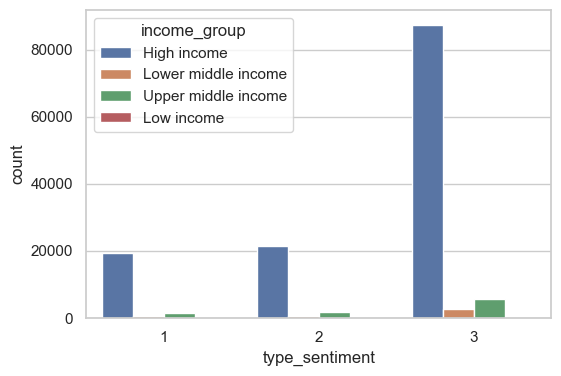

In [163]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type_sentiment', hue='income_group', data=df);

In [164]:
results = smf.mnlogit("type_sentiment ~ df_incomecateg['income_group_Upper middle income'] + df_incomecateg['income_group_Lower middle income'] + df_incomecateg['income_group_Low income'] ", data = df_incomecateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")
# High income and Lower middle income have significantly less neutral sentiment than lower income
# High income has significanly more positive sentiment than lower income

Optimization terminated successfully.
         Current function value: 0.851014
         Iterations 5


pvalues_neutral  \
index                                                                 
Intercept                                              2.009496e-37   
df_incomecateg['income_group_Upper middle income']     2.680764e-01   
df_incomecateg['income_group_Lower middle income']     1.349690e-01   
df_incomecateg['income_group_Low income']              6.236287e-01   

                                                    pvalues_positive  \
index                                                                  
Intercept                                                   0.000000   
df_incomecateg['income_group_Upper middle income']          0.023274   
df_incomecateg['income_group_Lower middle income']          0.064092   
df_incomecateg['income_group_Low income']                   0.138793   

                                                    params_neutral  \
index                                                                
Intercept                                                 0.129611   
df_incomecateg['income_group_Upper middle income']        0.045183   
df_incomecateg['income_group_Lower middle income']       -0.088650   
df_incomecateg['income_group_Low income']                 0.136092   

                                                    params_positive  
index                                                                
Intercept                                                  1.501697  
df_incomecateg['income_group_Upper middle income']         0.074951  
df_incomecateg['income_group_Lower middle income']        -0.087486  
df_incomecateg['income_group_Low income']                  0.332622

## Discourse as emotionality

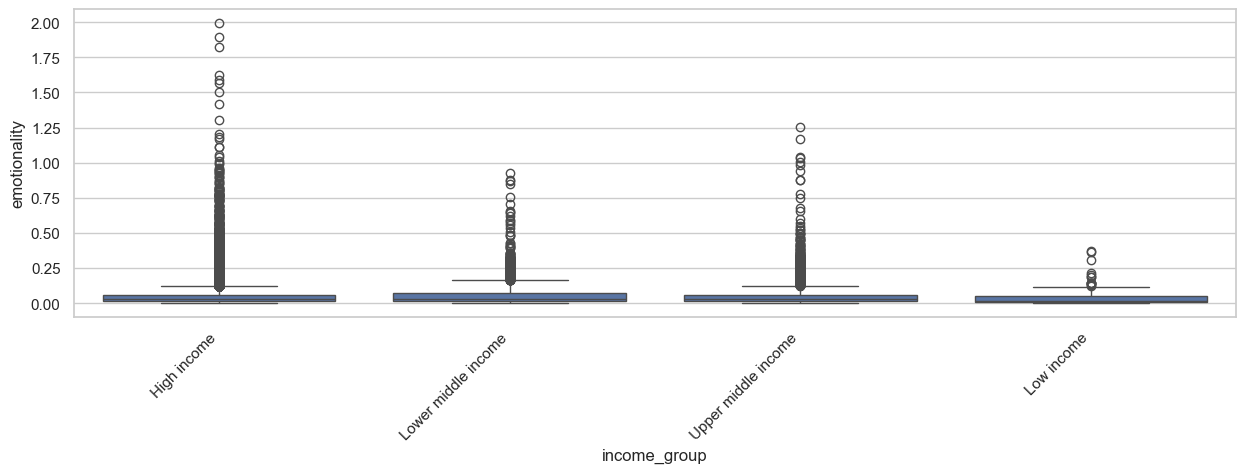

In [165]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.emotionality, x= df.income_group)
plt.xticks(rotation=45, ha="right");

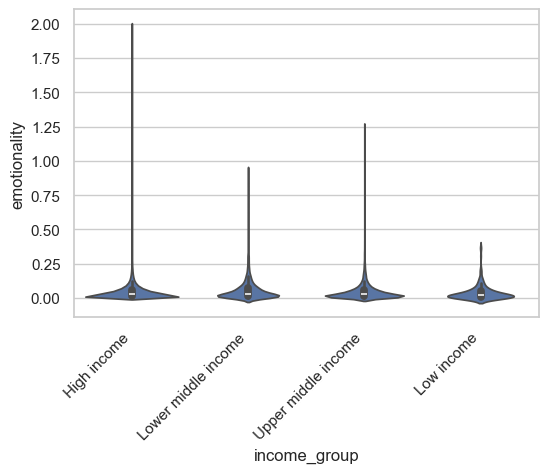

In [166]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.emotionality, x= df.income_group)
plt.xticks(rotation=45, ha="right");

In [167]:
results = smf.ols("emotionality ~ df_incomecateg['income_group_Upper middle income'] + df_incomecateg['income_group_Lower middle income'] + df_incomecateg['income_group_Low income']", data = df_incomecateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")
# All the other income groups have significantly more emotionality than Low income
# Lower middle income has the most emotionality

pvalues    params
index                                                                 
Intercept                                           0.000000  0.045007
df_incomecateg['income_group_Upper middle income']  0.000967  0.002037
df_incomecateg['income_group_Lower middle income']  0.000035  0.003837
df_incomecateg['income_group_Low income']           0.028941  0.008464

# Discourse by censor

In [168]:
df.censor.value_counts()

censor
02. Varies by region              70120
01. No censorship                 62368
06. State-enforced                 4827
05. Fine as punishment             1745
07. Imprisonment as punishment     1385
03. Ambiguous                       247
04. Other punishment                159
Name: count, dtype: int64

In [169]:
onehotencoder = preprocessing.OneHotEncoder()
censor_categ = onehotencoder.fit_transform(df[["censor"]].dropna(subset="censor")).toarray()
encoded_df = pd.DataFrame(censor_categ, columns=onehotencoder.get_feature_names_out(["censor"]))
df_censorecateg = pd.concat([df.dropna(subset="censor"), encoded_df], axis=1)
df_censorecateg.drop("censor", axis=1, inplace=True)
df_censorecateg

id_web        lat       long  \
0          1.0  45.524600 -73.604493   
1          2.0  45.514617 -73.575139   
2          3.0  45.525991 -73.603195   
3          4.0  45.525713 -73.603528   
4          5.0  45.460612 -73.504457   
...        ...        ...        ...   
140788     NaN        NaN        NaN   
140789     NaN        NaN        NaN   
140801     NaN        NaN        NaN   
140840     NaN        NaN        NaN   
140841     NaN        NaN        NaN   

                                                  comment language  sentiment  \
0       The place we will meet to describe our ruminat...       en    -0.2960   
1       10 Pines, as anglos call it, has the first mem...       en     0.8979   
2         this used to be a queer spot that I liked a lot       en     0.4215   
3       we argued about the best way to deal with  tho...       en     0.9091   
4       A riverside sunset gay/queer frolic took place...       en     0.3612   
...                                                   ...      ...        ...   
140788                                                NaN      NaN        NaN   
140789                                                NaN      NaN        NaN   
140801                                                NaN      NaN        NaN   
140840                                                NaN      NaN        NaN   
140841                                                NaN      NaN        NaN   

        type_sentiment  characters  emotionality country_name country_code  \
0                  1.0       173.0      0.039564       Canada          CAN   
1                  3.0       508.0      0.170131       Canada          CAN   
2                  3.0        47.0      0.011789       Canada          CAN   
3                  3.0       250.0      0.084220       Canada          CAN   
4                  3.0        93.0      0.022338       Canada          CAN   
...                ...         ...           ...          ...          ...   
140788             NaN         NaN           NaN          NaN          NaN   
140789             NaN         NaN           NaN          NaN          NaN   
140801             NaN         NaN           NaN          NaN          NaN   
140840             NaN         NaN           NaN          NaN          NaN   
140841             NaN         NaN           NaN          NaN          NaN   

               region income_group  mean_stability   mean_law  \
0       North America  High income       81.415844  96.279575   
1       North America  High income       81.415844  96.279575   
2       North America  High income       81.415844  96.279575   
3       North America  High income       81.415844  96.279575   
4       North America  High income       81.415844  96.279575   
...               ...          ...             ...        ...   
140788            NaN          NaN             NaN        NaN   
140789            NaN          NaN             NaN        NaN   
140801            NaN          NaN             NaN        NaN   
140840            NaN          NaN             NaN        NaN   
140841            NaN          NaN             NaN        NaN   

        mean_female_seats  mean_voice      mean_gdp  mean_children_out  \
0               46.227316   97.903451  5.667005e+11            0.51473   
1               46.227316   97.903451  5.667005e+11            0.51473   
2               46.227316   97.903451  5.667005e+11            0.51473   
3               46.227316   97.903451  5.667005e+11            0.51473   
4               46.227316   97.903451  5.667005e+11            0.51473   
...                   ...         ...           ...                ...   
140788                NaN         NaN           NaN                NaN   
140789                NaN         NaN           NaN                NaN   
140801                NaN         NaN           NaN                NaN   
140840                NaN         NaN           NaN                NaN   
140841                

## Discourse as sentiment

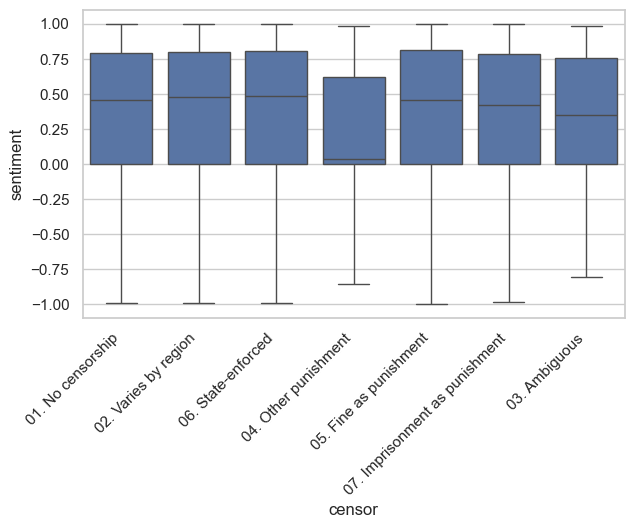

In [170]:
plt.figure(figsize=(7, 4))
sns.boxplot(y = df.sentiment, x= df.censor)
plt.xticks(rotation=45, ha="right");

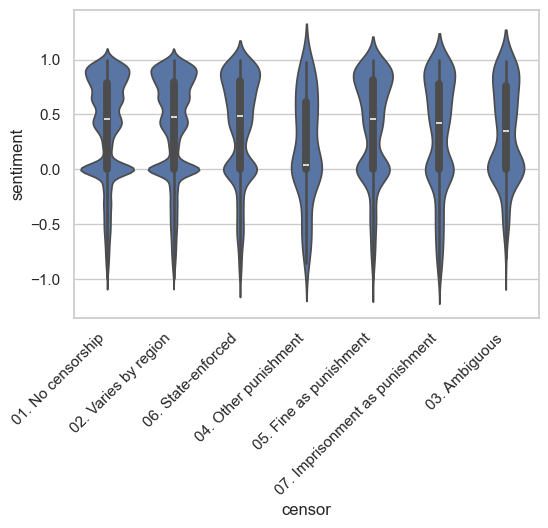

In [171]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.sentiment, x= df.censor)
plt.xticks(rotation=45, ha="right");

In [172]:
results = smf.ols("sentiment ~ df_censorecateg['censor_01. No censorship'] +  df_censorecateg['censor_02. Varies by region'] + df_censorecateg['censor_03. Ambiguous'] + df_censorecateg['censor_04. Other punishment'] + df_censorecateg['censor_05. Fine as punishment'] + df_censorecateg['censor_06. State-enforced']", data = df_censorecateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")
# censor_01. No censorship 
# censor_02. Varies by region
# censor_03. Ambiguous
# censor_04. Other punishment
# censor_05. Fine as punishment
# censor_06. State-enforced
# censor_07. Imprisonment as punishment -> reference category

pvalues    params
index                                                                    
Intercept                                         3.404956e-213  0.402726
df_censorecateg['censor_01. No censorship']        2.316450e-02 -0.029614
df_censorecateg['censor_02. Varies by region']     5.982512e-02 -0.024516
df_censorecateg['censor_03. Ambiguous']            1.345074e-01 -0.049567
df_censorecateg['censor_04. Other punishment']     4.718123e-01  0.028717
df_censorecateg['censor_05. Fine as punishment']   7.742703e-01  0.004950
df_censorecateg['censor_06. State-enforced']       6.813948e-01 -0.006014

## Discourse as type_sentiment

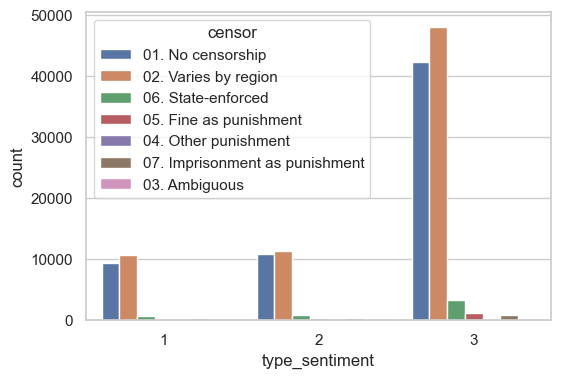

In [173]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type_sentiment', hue='censor', data=df);

In [174]:
results = smf.mnlogit("type_sentiment ~ df_censorecateg['censor_01. No censorship'] +  df_censorecateg['censor_02. Varies by region'] + df_censorecateg['censor_03. Ambiguous'] + df_censorecateg['censor_04. Other punishment'] + df_censorecateg['censor_05. Fine as punishment'] + df_censorecateg['censor_06. State-enforced']", data = df_censorecateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")

Optimization terminated successfully.
         Current function value: 0.851099
         Iterations 5


pvalues_neutral  \
index                                                               
Intercept                                                0.475056   
df_censorecateg['censor_01. No censorship']              0.063885   
df_censorecateg['censor_02. Varies by region']           0.033211   
df_censorecateg['censor_03. Ambiguous']                  0.333361   
df_censorecateg['censor_04. Other punishment']           0.350140   
df_censorecateg['censor_05. Fine as punishment']         0.117844   
df_censorecateg['censor_06. State-enforced']             0.068988   

                                                  pvalues_positive  \
index                                                                
Intercept                                             2.890477e-85   
df_censorecateg['censor_01. No censorship']           5.632656e-01   
df_censorecateg['censor_02. Varies by region']        8.278167e-01   
df_censorecateg['censor_03. Ambiguous']               1.692707e-01   
df_censorecateg['censor_04. Other punishment']        5.652868e-01   
df_censorecateg['censor_05. Fine as punishment']      2.595372e-01   
df_censorecateg['censor_06. State-enforced']          5.101237e-01   

                                                  params_neutral  \
index                                                              
Intercept                                              -0.072949   
df_censorecateg['censor_01. No censorship']             0.191139   
df_censorecateg['censor_02. Varies by region']          0.219447   
df_censorecateg['censor_03. Ambiguous']                -0.245505   
df_censorecateg['censor_04. Other punishment']          0.296093   
df_censorecateg['censor_05. Fine as punishment']        0.214263   
df_censorecateg['censor_06. State-enforced']            0.210190   

                                                  params_positive  
index                                                              
Intercept                                                1.529981  
df_censorecateg['censor_01. No censorship']             -0.045693  
df_censorecateg['censor_02. Varies by region']          -0.017177  
df_censorecateg['censor_03. Ambiguous']                 -0.257925  
df_censorecateg['censor_04. Other punishment']           0.147115  
df_censorecateg['censor_05. Fine as punishment']         0.120564  
df_censorecateg['censor_06. State-enforced']             0.058903

## Discourse as emotionality

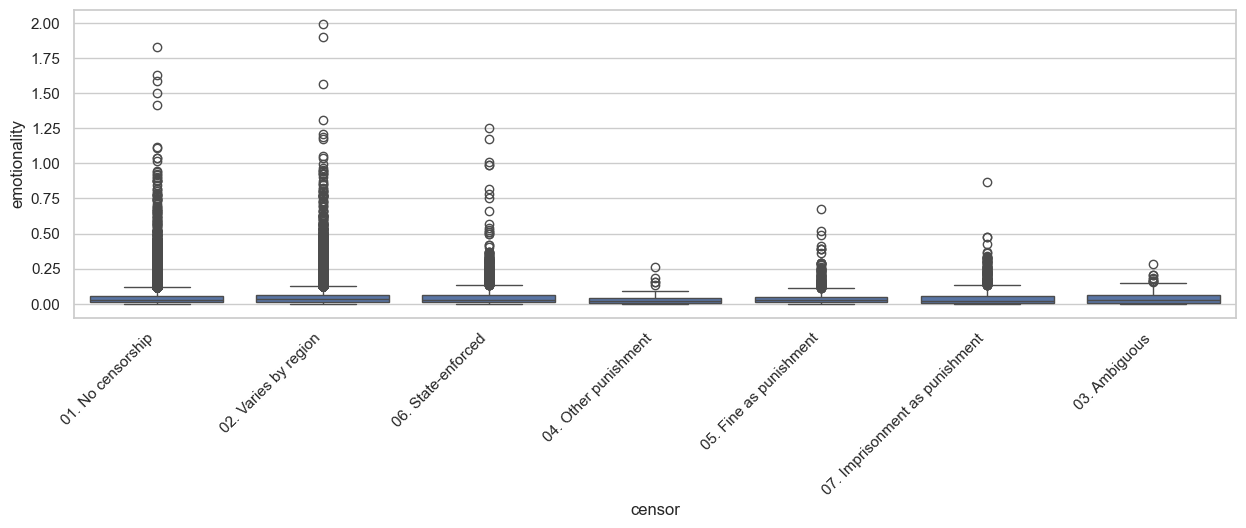

In [175]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.emotionality, x= df.censor)
plt.xticks(rotation=45, ha="right");

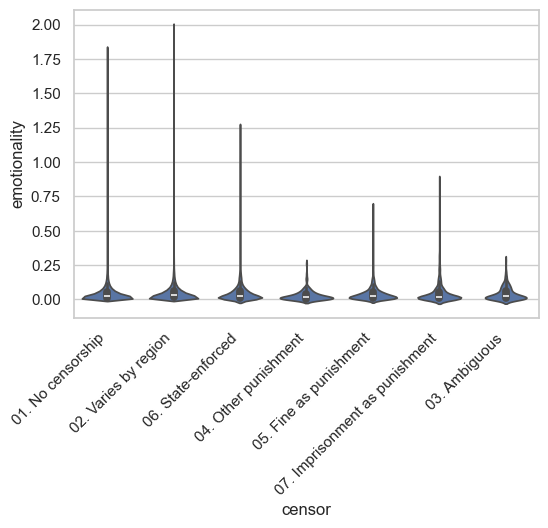

In [176]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.emotionality, x= df.censor)
plt.xticks(rotation=45, ha="right");

In [177]:
results = smf.ols("emotionality ~ df_censorecateg['censor_01. No censorship'] +  df_censorecateg['censor_02. Varies by region'] + df_censorecateg['censor_03. Ambiguous'] + df_censorecateg['censor_04. Other punishment'] + df_censorecateg['censor_05. Fine as punishment'] + df_censorecateg['censor_06. State-enforced']", data = df_censorecateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")

pvalues    params
index                                                                    
Intercept                                         2.840159e-226  0.048286
df_censorecateg['censor_01. No censorship']        5.776440e-02 -0.002879
df_censorecateg['censor_02. Varies by region']     1.821738e-02 -0.003578
df_censorecateg['censor_03. Ambiguous']            7.393498e-02 -0.006886
df_censorecateg['censor_04. Other punishment']     4.946909e-01  0.003171
df_censorecateg['censor_05. Fine as punishment']   8.349811e-01  0.000418
df_censorecateg['censor_06. State-enforced']       8.708714e-01 -0.000277

# Discourse by transition

In [178]:
df.transition.value_counts()

transition
03. Varies by region               77139
01. Legal, surgery not required    50015
02. Legal, but requires surgery     6958
05. Illegal                         3259
04. Ambiguous                       3112
Name: count, dtype: int64

In [179]:
onehotencoder = preprocessing.OneHotEncoder()
transition_categ = onehotencoder.fit_transform(df[["transition"]].dropna(subset="transition")).toarray()
encoded_df = pd.DataFrame(transition_categ, columns=onehotencoder.get_feature_names_out(["transition"]))
df_transcateg = pd.concat([df.dropna(subset="transition"), encoded_df], axis=1)
df_transcateg.drop("transition", axis=1, inplace=True)
df_transcateg
# transition_01. Legal, surgery not required
# transition_02. Legal, but requires surgery
# transition_03. Varies by region
# transition_04. Ambiguous
# transition_05. Illegal

id_web        lat       long  \
0          1.0  45.524600 -73.604493   
1          2.0  45.514617 -73.575139   
2          3.0  45.525991 -73.603195   
3          4.0  45.525713 -73.603528   
4          5.0  45.460612 -73.504457   
...        ...        ...        ...   
140452     NaN        NaN        NaN   
140459     NaN        NaN        NaN   
140462     NaN        NaN        NaN   
140479     NaN        NaN        NaN   
140481     NaN        NaN        NaN   

                                                  comment language  sentiment  \
0       The place we will meet to describe our ruminat...       en    -0.2960   
1       10 Pines, as anglos call it, has the first mem...       en     0.8979   
2         this used to be a queer spot that I liked a lot       en     0.4215   
3       we argued about the best way to deal with  tho...       en     0.9091   
4       A riverside sunset gay/queer frolic took place...       en     0.3612   
...                                                   ...      ...        ...   
140452                                                NaN      NaN        NaN   
140459                                                NaN      NaN        NaN   
140462                                                NaN      NaN        NaN   
140479                                                NaN      NaN        NaN   
140481                                                NaN      NaN        NaN   

        type_sentiment  characters  emotionality country_name country_code  \
0                  1.0       173.0      0.039564       Canada          CAN   
1                  3.0       508.0      0.170131       Canada          CAN   
2                  3.0        47.0      0.011789       Canada          CAN   
3                  3.0       250.0      0.084220       Canada          CAN   
4                  3.0        93.0      0.022338       Canada          CAN   
...                ...         ...           ...          ...          ...   
140452             NaN         NaN           NaN          NaN          NaN   
140459             NaN         NaN           NaN          NaN          NaN   
140462             NaN         NaN           NaN          NaN          NaN   
140479             NaN         NaN           NaN          NaN          NaN   
140481             NaN         NaN           NaN          NaN          NaN   

               region income_group  mean_stability   mean_law  \
0       North America  High income       81.415844  96.279575   
1       North America  High income       81.415844  96.279575   
2       North America  High income       81.415844  96.279575   
3       North America  High income       81.415844  96.279575   
4       North America  High income       81.415844  96.279575   
...               ...          ...             ...        ...   
140452            NaN          NaN             NaN        NaN   
140459            NaN          NaN             NaN        NaN   
140462            NaN          NaN             NaN        NaN   
140479            NaN          NaN             NaN        NaN   
140481            NaN          NaN             NaN        NaN   

        mean_female_seats  mean_voice      mean_gdp  mean_children_out  \
0               46.227316   97.903451  5.667005e+11            0.51473   
1               46.227316   97.903451  5.667005e+11            0.51473   
2               46.227316   97.903451  5.667005e+11            0.51473   
3               46.227316   97.903451  5.667005e+11            0.51473   
4               46.227316   97.903451  5.667005e+11            0.51473   
...                   ...         ...           ...                ...   
140452                NaN         NaN           NaN                NaN   
140459                NaN         NaN           NaN                NaN   
140462                NaN         NaN           NaN                NaN   
140479                NaN         NaN           NaN                NaN   
140481                

## Discourse as sentiment

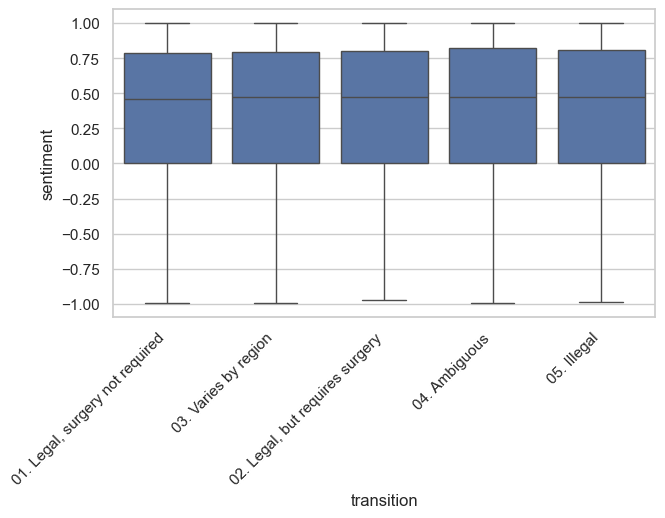

In [202]:
plt.figure(figsize=(7, 4))
sns.boxplot(y = df.sentiment, x= df.transition)
plt.xticks(rotation=45, ha="right");

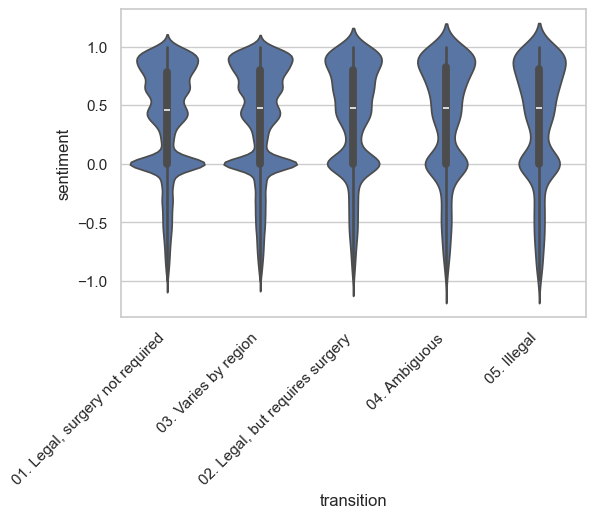

In [203]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.sentiment, x= df.transition)
plt.xticks(rotation=45, ha="right");

In [204]:
results = smf.ols("sentiment ~ df_transcateg['transition_02. Legal, but requires surgery'] + df_transcateg['transition_03. Varies by region'] + df_transcateg['transition_04. Ambiguous'] + df_transcateg['transition_05. Illegal']", data = df_transcateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")
# transition_01. Legal, surgery not required -> reference category
# transition_02. Legal, but requires surgery
# transition_03. Varies by region
# transition_04. Ambiguous
# transition_05. Illegal 

pvalues    params
index                                                                 
Intercept                                           0.000000  0.375823
df_transcateg['transition_02. Legal, but requir...  0.106977  0.009934
df_transcateg['transition_03. Varies by region']    0.939524  0.000209
df_transcateg['transition_04. Ambiguous']           0.022415  0.020352
df_transcateg['transition_05. Illegal']             0.229530  0.010493

## Discourse as type_sentiment

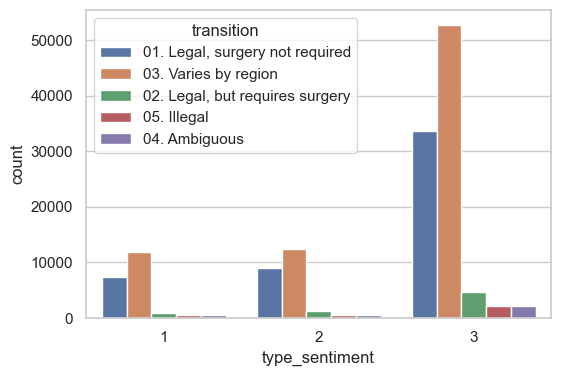

In [183]:
plt.figure(figsize=(6, 4))
sns.countplot(x='type_sentiment', hue='transition', data=df);

In [184]:
results = smf.mnlogit("type_sentiment ~ df_transcateg['transition_01. Legal, surgery not required'] + df_transcateg['transition_02. Legal, but requires surgery'] + df_transcateg['transition_03. Varies by region'] + df_transcateg['transition_04. Ambiguous']", data = df_transcateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")

Optimization terminated successfully.
         Current function value: 0.851219
         Iterations 5


pvalues_neutral  \
index                                                                 
Intercept                                                  0.105283   
df_transcateg['transition_01. Legal, surgery no...         0.896441   
df_transcateg['transition_02. Legal, but requir...         0.711881   
df_transcateg['transition_03. Varies by region']           0.548370   
df_transcateg['transition_04. Ambiguous']                  0.747456   

                                                    pvalues_positive  \
index                                                                  
Intercept                                              1.083392e-189   
df_transcateg['transition_01. Legal, surgery no...      5.724520e-01   
df_transcateg['transition_02. Legal, but requir...      7.618066e-01   
df_transcateg['transition_03. Varies by region']        6.589402e-01   
df_transcateg['transition_04. Ambiguous']               2.977889e-01   

                                                    params_neutral  \
index                                                                
Intercept                                                 0.105139   
df_transcateg['transition_01. Legal, surgery no...        0.008711   
df_transcateg['transition_02. Legal, but requir...       -0.029004   
df_transcateg['transition_03. Varies by region']          0.039739   
df_transcateg['transition_04. Ambiguous']                 0.030234   

                                                    params_positive  
index                                                                
Intercept                                                  1.526249  
df_transcateg['transition_01. Legal, surgery no...        -0.030243  
df_transcateg['transition_02. Legal, but requir...        -0.019021  
df_transcateg['transition_03. Varies by region']          -0.023401  
df_transcateg['transition_04. Ambiguous']                  0.078263

## Discourse as emotionality

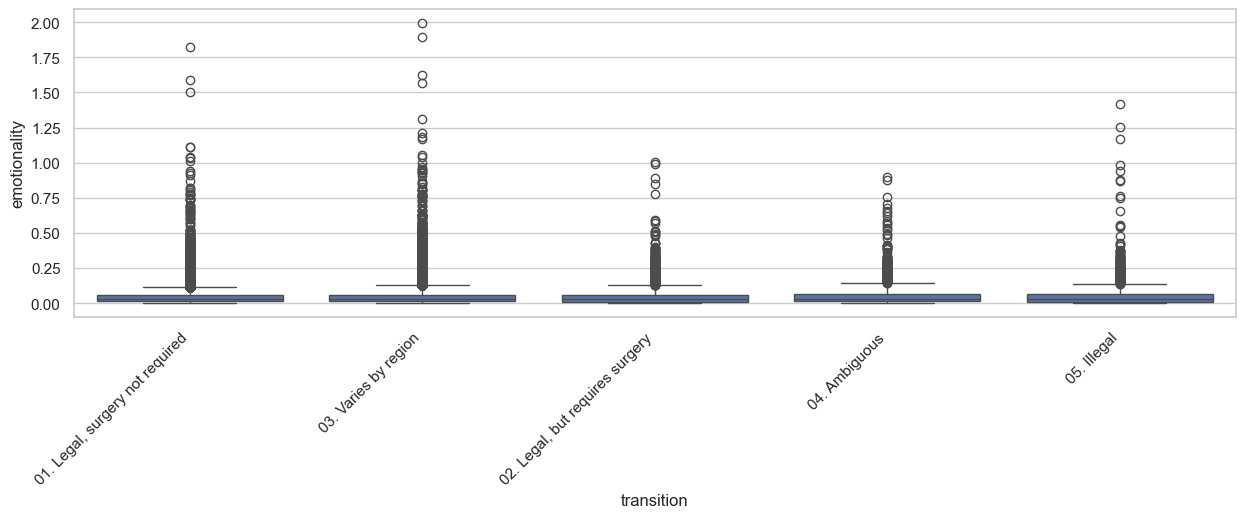

In [185]:
plt.figure(figsize=(15, 4))
sns.boxplot(y = df.emotionality, x= df.transition)
plt.xticks(rotation=45, ha="right");

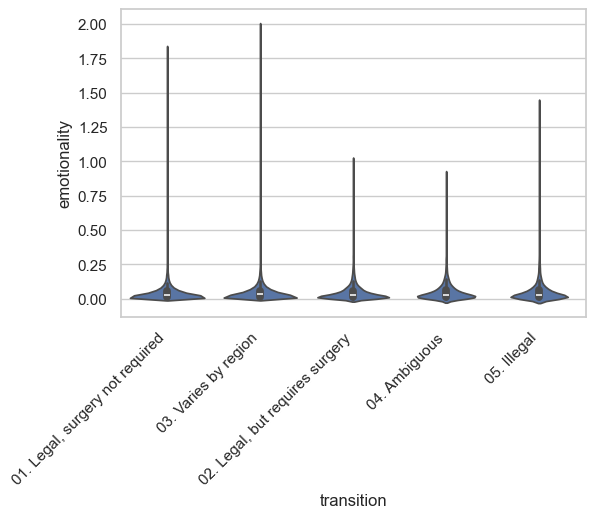

In [186]:
plt.figure(figsize=(6, 4))
sns.violinplot(y = df.emotionality, x= df.transition)
plt.xticks(rotation=45, ha="right");

In [187]:
results = smf.ols("emotionality ~ df_transcateg['transition_02. Legal, but requires surgery'] + df_transcateg['transition_03. Varies by region'] + df_transcateg['transition_04. Ambiguous'] + df_transcateg['transition_05. Illegal']", data = df_transcateg).fit()
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")
# Same conclusions

pvalues    params
index                                                                 
Intercept                                           0.000000  0.045240
df_transcateg['transition_02. Legal, but requir...  0.000528  0.002478
df_transcateg['transition_03. Varies by region']    0.160484 -0.000449
df_transcateg['transition_04. Ambiguous']           0.133209  0.001553
df_transcateg['transition_05. Illegal']             0.012426  0.002533

 27  transition            139838 non-null  object 


# All the variables together

**Imputation**:

Method: Mean for each variable missing grouping by some of the categorical variables: region and income_group (as they could be determining more the continuous variables)

In [188]:
df.dropna(subset= ["region", "income_group", "censor", "transition"]).shape[0]/df.shape[0]
# 93.96% of values not missing if we drop the nan of the categorical variables.

0.9396347581778045

In [189]:
df_reg = df.dropna(subset= ["region", "income_group", "censor", "transition"])

In [190]:
df_reg.isna().sum()

id_web                      0
lat                         0
long                        0
comment                     0
language                    0
sentiment                   0
type_sentiment              0
characters                  0
emotionality                0
country_name                0
country_code                0
region                      0
income_group                0
mean_stability          70681
mean_law                70681
mean_female_seats       70681
mean_voice              70681
mean_gdp                70772
mean_children_out       70911
mean_ed_exp             70787
mean_literacy           70920
mean_ARV_coverage       83936
mean_health_exp         70696
mean_UHC_coverage       70681
mean_rights             70681
mean_sex_index          70681
censor                      0
transition                  0
mean_hate_protection    70681
cluster                     0
dtype: int64

In [191]:
df_reg["mean_stability"] = df_reg.groupby(["region", "income_group"])["mean_stability"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_law"] = df_reg.groupby(["region", "income_group"])["mean_law"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_female_seats"] = df_reg.groupby(["region", "income_group"])["mean_female_seats"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_voice"] = df_reg.groupby(["region", "income_group"])["mean_voice"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_gdp"] = df_reg.groupby(["region", "income_group"])["mean_gdp"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_children_out"] = df_reg.groupby(["region", "income_group"])["mean_children_out"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_ed_exp"] = df_reg.groupby(["region", "income_group"])["mean_ed_exp"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_literacy"] = df_reg.groupby(["region", "income_group"])["mean_literacy"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_ARV_coverage"] = df_reg.groupby(["region", "income_group"])["mean_ARV_coverage"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_health_exp"] = df_reg.groupby(["region", "income_group"])["mean_health_exp"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_UHC_coverage"] = df_reg.groupby(["region", "income_group"])["mean_UHC_coverage"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_rights"] = df_reg.groupby(["region", "income_group"])["mean_rights"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_sex_index"] = df_reg.groupby(["region", "income_group"])["mean_sex_index"].transform(lambda x: x.fillna(x.mean()))
df_reg["mean_hate_protection"] = df_reg.groupby(["region", "income_group"])["mean_hate_protection"].transform(lambda x: x.fillna(x.mean()))
df_reg.reset_index(drop=True, inplace=True)

C:\Users\gdcma\AppData\Local\Temp\ipykernel_22504\1679567132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg["mean_stability"] = df_reg.groupby(["region", "income_group"])["mean_stability"].transform(lambda x: x.fillna(x.mean()))
C:\Users\gdcma\AppData\Local\Temp\ipykernel_22504\1679567132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg["mean_law"] = df_reg.groupby(["region", "income_group"])["mean_law"].transform(lambda x: x.fillna(x.mean()))
C:\Users\gdcma\AppData\Local\Temp\ipykerne

In [192]:
onehotencoder = preprocessing.OneHotEncoder()
regions_categ = onehotencoder.fit_transform(df_reg[["region"]]).toarray()
encoded_df = pd.DataFrame(regions_categ, columns=onehotencoder.get_feature_names_out(["region"]))
df_categ = pd.concat([df_reg, encoded_df], axis=1)

income_categ = onehotencoder.fit_transform(df_reg[["income_group"]]).toarray()
encoded_df = pd.DataFrame(income_categ, columns=onehotencoder.get_feature_names_out(["income_group"]))
df_categ = pd.concat([df_categ, encoded_df], axis=1)

censor_categ = onehotencoder.fit_transform(df_reg[["censor"]]).toarray()
encoded_df = pd.DataFrame(censor_categ, columns=onehotencoder.get_feature_names_out(["censor"]))
df_categ = pd.concat([df_categ, encoded_df], axis=1)

transition_categ = onehotencoder.fit_transform(df_reg[["transition"]]).toarray()
encoded_df = pd.DataFrame(transition_categ, columns=onehotencoder.get_feature_names_out(["transition"]))
df_categ = pd.concat([df_categ, encoded_df], axis=1)

df_categ.drop(["region", "income_group", "censor", "transition"], axis=1, inplace=True)

In [193]:
df_categ.columns

Index(['id_web', 'lat', 'long', 'comment', 'language', 'sentiment',
       'type_sentiment', 'characters', 'emotionality', 'country_name',
       'country_code', 'mean_stability', 'mean_law', 'mean_female_seats',
       'mean_voice', 'mean_gdp', 'mean_children_out', 'mean_ed_exp',
       'mean_literacy', 'mean_ARV_coverage', 'mean_health_exp',
       'mean_UHC_coverage', 'mean_rights', 'mean_sex_index',
       'mean_hate_protection', 'cluster', 'region_East Asia & Pacific',
       'region_Europe & Central Asia', 'region_Latin America & Caribbean',
       'region_Middle East & North Africa', 'region_North America',
       'region_South Asia', 'region_Sub-Saharan Africa',
       'income_group_High income', 'income_group_Low income',
       'income_group_Lower middle income', 'income_group_Upper middle income',
       'censor_01. No censorship', 'censor_02. Varies by region',
       'censor_03. Ambiguous', 'censor_04. Other punishment',
       'censor_05. Fine as punishment', 'censor_06. 

In [194]:
df_categ[['mean_stability', 'mean_law', 'mean_female_seats', 'mean_voice', 'mean_gdp', 'mean_children_out', 'mean_ed_exp',
    'mean_literacy', 'mean_ARV_coverage', 'mean_health_exp', 'mean_UHC_coverage', 'mean_rights', 'mean_sex_index',
    'mean_hate_protection']].corr()

mean_stability  mean_law  mean_female_seats  mean_voice  \
mean_stability              1.000000  0.846851           0.434665    0.886549   
mean_law                    0.846851  1.000000           0.650700    0.896351   
mean_female_seats           0.434665  0.650700           1.000000    0.689989   
mean_voice                  0.886549  0.896351           0.689989    1.000000   
mean_gdp                    0.241463  0.379349           0.289114    0.382428   
mean_children_out          -0.559730 -0.740012          -0.474424   -0.633275   
mean_ed_exp                 0.584547  0.659322           0.756772    0.777690   
mean_literacy               0.624673  0.664618           0.175407    0.529475   
mean_ARV_coverage           0.605273  0.724598           0.760346    0.733240   
mean_health_exp             0.624136  0.729192           0.745566    0.829911   
mean_UHC_coverage           0.725580  0.849025           0.470354    0.767887   
mean_rights                 0.689155  0.815166           0.737693    0.856576   
mean_sex_index             -0.523323 -0.526788          -0.271030   -0.473008   
mean_hate_protection        0.635574  0.707890           0.536491    0.719050   

                      mean_gdp  mean_children_out  mean_ed_exp  mean_literacy  \
mean_stability        0.241463          -0.559730     0.584547       0.624673   
mean_law              0.379349          -0.740012     0.659322       0.664618   
mean_female_seats     0.289114          -0.474424     0.756772       0.175407   
mean_voice            0.382428          -0.633275     0.777690       0.529475   
mean_gdp              1.000000          -0.347486     0.296620       0.198844   
mean_children_out    -0.347486           1.000000    -0.521322      -0.693810   
mean_ed_exp           0.296620          -0.521322     1.000000       0.329125   
mean_literacy         0.198844          -0.693810     0.329125       1.000000   
mean_ARV_coverage     0.344201          -0.443906     0.659087       0.388769   
mean_health_exp       0.501465          -0.577278     0.876155       0.332535   
mean_UHC_coverage     0.384869          -0.801103     0.542347       0.844665   
mean_rights           0.425627          -0.649791     0.804332       0.498416   
mean_sex_index       -0.235145           0.487266    -0.410630      -0.600375   
mean_hate_protection  0.276469          -0.553623     0.658708       0.505728   

                      mean_ARV_coverage  mean_health_exp  mean_UHC_coverage  \
mean_stability                 0.605273         0.624136           0.725580   
mean_law                       0.724598         0.729192           0.849025   
mean_female_seats              0.760346         0.745566           0.470354   
mean_voice                     0.733240         0.829911           0.767887   
mean_gdp                       0.344201         0.501465           0.384869   
mean_children_out             -0.443906        -0.577278          -0.801103   
mean_ed_exp                    0.659087         0.876155           0.542347   
mean_literacy                  0.388769         0.332535           0.844665   
mean_ARV_coverage              1.000000         0.682528           0.576641   
mean_health_exp                0.682528         1.000000           0.630205   
mean_UHC_coverage              0.576641         0.630205           1.000000   
mean_rights                    0.745328         0.861284           0.778226   
mean_sex_index                -0.432101        -0.479521          -0.626223   
mean_hate_protection           0.623847         0.681388           0.738666   

                      mean_rights  mean_sex_index  mean_hate_protection  
mean_stability           0.689155       -0.523323              0.635574  
mean_law                 0.815166       -0.526788              0.707890  
mean_female_seats        0.737693       -0.271030              0.536491  
mean_voice               0.856576       -0.473008              0.719050  
mean_gdp                 0.425627 

## Discourse as sentiment

In [195]:
results = smf.ols("sentiment ~ mean_stability + mean_law + mean_female_seats + mean_voice + mean_gdp + mean_children_out + mean_ed_exp + mean_literacy + mean_ARV_coverage + mean_health_exp + mean_UHC_coverage + mean_rights + mean_sex_index + mean_hate_protection + df_categ['region_Europe & Central Asia'] + df_categ['region_Latin America & Caribbean'] + df_categ['region_Middle East & North Africa'] + df_categ['region_North America'] + df_categ['region_South Asia'] + df_categ['region_Sub-Saharan Africa'] + df_categ['income_group_Low income'] + df_categ['income_group_Lower middle income'] + df_categ['income_group_Upper middle income'] + df_categ['censor_01. No censorship'] + df_categ['censor_02. Varies by region'] + df_categ['censor_03. Ambiguous'] + df_categ['censor_04. Other punishment'] + df_categ['censor_05. Fine as punishment'] + df_categ['censor_06. State-enforced'] + df_categ['transition_01. Legal, surgery not required'] + df_categ['transition_02. Legal, but requires surgery'] + df_categ['transition_03. Varies by region'] + df_categ['transition_04. Ambiguous']", data = df_categ).fit()
results.summary()
# Reference categories: 'region_East Asia & Pacific', 'income_group_High income', 'censor_07. Imprisonment as punishment', 'transition_05. Illegal'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sentiment   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.192
Date:                Thu, 28 Dec 2023   Prob (F-statistic):           5.12e-39
Time:                        22:10:00   Log-Likelihood:                -92391.
No. Observations:              140466   AIC:                         1.848e+05
Df Residuals:                  140432   BIC:                         1.852e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  0.3646      0.042      8.578      0.000       0.281       0.448
mean_stability                                             0.0005      0.000      1.986      0.047    6.85e-06       0.001
mean_law                                                   0.0002      0.000      0.728      0.467      -0.000       0.001
mean_female_seats                                          0.0002      0.000      0.744      0.457      -0.000       0.001
mean_voice                                                -0.0001      0.000     -0.370      0.711      -0.001       0.000
mean_gdp                                               -4.937e-15   4.27e-15     -1.157      0.247   -1.33e-14    3.42e-15
mean_children_out                                         -0.0007      0.001     -0.960      0.337      -0.002       0.001
mean_ed_exp                                               -0.0029      0.002     -1.363      0.173      -0.007       0.001
mean_literacy                                              0.0002      0.000      0.495      0.621      -0.001       0.001
mean_ARV_coverage                                         -0.0005      0.000     -2.377      0.017      -0.001   -8.93e-05
mean_health_exp                                            0.0016      0.002      0.826      0.409      -0.002       0.005
mean_UHC_coverage                                         -0.0012      0.000     -2.550      0.011      -0.002      -0.000
mean_rights                                             5.468e-05      0.002      0.027      0.978      -0.004       0.004
mean_sex_index                                             0.0827      0.024      3.476      0.001       0.036       0.129
mean_hate_protection                                       0.0377      0.011      3.337      0.001       0.016       0.060
df_categ['region_Europe & Central Asia']                   0.0075      0.012      0.632      0.528      -0.016       0.031
df_categ['region_Latin America & Caribbean']              -0.0312      0.015     -2.037      0.042      -0.061      -0.001
df_categ['region_Middle East & North Africa']             -0.0300      0.018     -1.680      0.093      -0.065       0.005
df_categ['region_North America']                          -0.0234      0.015     -1.590      0.112      -0.052       0.005
df_categ['region_South Asia']                              0.0307      0.023      1.325      0.185      -0.015       0.076
df_categ['region_Sub-Saharan Africa']                      0.0801      0.024      3.299      0.001       0.033       0.128
df_categ['income_group_Low income']                       -0.1367      0.041     -3.311      0.001      -0.218      -0.056
df_categ

In [196]:
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")

pvalues        params
index                                                                         
Intercept                                           9.735834e-18  3.645590e-01
mean_stability                                      4.707291e-02  5.298575e-04
mean_law                                            4.667247e-01  2.171468e-04
mean_female_seats                                   4.565885e-01  2.484209e-04
mean_voice                                          7.111574e-01 -1.052611e-04
mean_gdp                                            2.471276e-01 -4.936983e-15
mean_children_out                                   3.371182e-01 -6.631854e-04
mean_ed_exp                                         1.730333e-01 -2.870193e-03
mean_literacy                                       6.207066e-01  2.062086e-04
mean_ARV_coverage                                   1.743667e-02 -5.085612e-04
mean_health_exp                                     4.085597e-01  1.600227e-03
mean_UHC_coverage                                   1.076728e-02 -1.239511e-03
mean_rights                                         9.783647e-01  5.468276e-05
mean_sex_index                                      5.092681e-04  8.272276e-02
mean_hate_protection                                8.464976e-04  3.770694e-02
df_categ['region_Europe & Central Asia']            5.277016e-01  7.514138e-03
df_categ['region_Latin America & Caribbean']        4.168091e-02 -3.118771e-02
df_categ['region_Middle East & North Africa']       9.291297e-02 -3.004869e-02
df_categ['region_North America']                    1.117380e-01 -2.341415e-02
df_categ['region_South Asia']                       1.851692e-01  3.073926e-02
df_categ['region_Sub-Saharan Africa']               9.698598e-04  8.012712e-02
df_categ['income_group_Low income']                 9.293425e-04 -1.366794e-01
df_categ['income_group_Lower middle income']        4.612828e-01  9.956330e-03
df_categ['income_group_Upper middle income']        3.007255e-01 -9.992746e-03
df_categ['censor_01. No censorship']                1.211594e-04  7.907812e-02
df_categ['censor_02. Varies by region']             5.692929e-07  1.174667e-01
df_categ['censor_03. Ambiguous']                    8.170347e-01 -9.474479e-03
df_categ['censor_04. Other punishment']             3.052081e-02 -9.580888e-02
df_categ['censor_05. Fine as punishment']           2.126322e-03  8.313862e-02
df_categ['censor_06. State-enforced']               1.786075e-04  7.800163e-02
df_categ['transition_01. Legal, surgery not req...  1.960927e-02 -3.134414e-02
df_categ['transition_02. Legal, but requires su...  4.242546e-01  1.040135e-02
df_categ['transition_03. Varies by region']         1.220829e-02 -4.647625e-02
df_categ['transition_04. Ambiguous']                8.860066e-01  2.451054e-03

    R-squared superlow

## Discourse as type_sentiment

In [197]:
results = smf.mnlogit("type_sentiment ~ mean_stability + mean_law + mean_female_seats + mean_voice + mean_gdp + mean_children_out + mean_ed_exp + mean_literacy + mean_ARV_coverage + mean_health_exp + mean_UHC_coverage + mean_rights + mean_sex_index + mean_hate_protection + df_categ['region_Europe & Central Asia'] + df_categ['region_Latin America & Caribbean'] + df_categ['region_Middle East & North Africa'] + df_categ['region_North America'] + df_categ['region_South Asia'] + df_categ['region_Sub-Saharan Africa'] + df_categ['income_group_Low income'] + df_categ['income_group_Lower middle income'] + df_categ['income_group_Upper middle income'] + df_categ['censor_01. No censorship'] + df_categ['censor_02. Varies by region'] + df_categ['censor_03. Ambiguous'] + df_categ['censor_04. Other punishment'] + df_categ['censor_05. Fine as punishment'] + df_categ['censor_06. State-enforced'] + df_categ['transition_01. Legal, surgery not required'] + df_categ['transition_02. Legal, but requires surgery'] + df_categ['transition_03. Varies by region'] + df_categ['transition_04. Ambiguous']", data = df_categ).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.844921
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         type_sentiment   No. Observations:               140466
Model:                        MNLogit   Df Residuals:                   140398
Method:                           MLE   Df Model:                           66
Date:                Thu, 28 Dec 2023   Pseudo R-squ.:                0.003393
Time:                        22:10:06   Log-Likelihood:            -1.1868e+05
converged:                       True   LL-Null:                   -1.1909e+05
Covariance Type:            nonrobust   LLR p-value:                3.630e-128
==========================================================================================================================
                                      type_sentiment=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 -1.2380      0.325     -3.811      0.000      -1.875      -0.601
mean_stability                                            -0.0034      0.002     -1.673      0.094      -0.007       0.001
mean_law                                                   0.0088      0.002      3.927      0.000       0.004       0.013
mean_female_seats                                          0.0014      0.003      0.549      0.583      -0.004       0.006
mean_voice                                                -0.0062      0.002     -2.867      0.004      -0.010      -0.002
mean_gdp                                               -7.119e-14    3.2e-14     -2.224      0.026   -1.34e-13   -8.46e-15
mean_children_out                                          0.0182      0.005      3.470      0.001       0.008       0.028
mean_ed_exp                                                0.0212      0.016      1.345      0.179      -0.010       0.052
mean_literacy                                              0.0029      0.003      0.913      0.361      -0.003       0.009
mean_ARV_coverage                                          0.0020      0.002      1.222      0.222      -0.001       0.005
mean_health_exp                                            0.0030      0.014      0.208      0.835      -0.025       0.031
mean_UHC_coverage                                          0.0068      0.004      1.858      0.063      -0.000       0.014
mean_rights                                                0.0117      0.015      0.761      0.447      -0.018       0.042
mean_sex_index                                            -0.3283      0.184     -1.783      0.075      -0.689       0.033
mean_hate_protection                                      -0.3289      0.085     -3.847      0.000      -0.496      -0.161
df_categ['region_Europe & Central Asia']                   0.2387      0.092      2.598      0.009       0.059       0.419
df_categ['region_Latin America & Caribbean']               0.1890      0.115      1.637      0.102      -0.037       0.415
df_categ['region_Middle East & North Africa']             -0.0045      0.135     -0.033      0.974      -0.269       0.260
df_categ['region_North America']                          -0.0463      0.112     -0.412      0.680      -0.267       0.174
df_categ['region_South Asia']                             -0.0988      0.179     -0.550      0.582      -0.450       0.253
df_categ['region_Sub-Saharan Africa']                      0.1956      0.203      0.963      0.336      -0.203       0.594
df_categ['income_group_Low income']                        0.5666      0.290      1.953      0.051      -0.002       1.135
df_categ['income_group_Lower middle income']               0.0630      0.103      0.612      0.540      -0.139       0.265
df_categ['income_group_Upper middle income'

In [198]:
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues_neutral", 1: "pvalues_positive"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params_neutral", 1: "params_positive"}), on ="index").set_index("index")

pvalues_neutral  \
index                                                                 
Intercept                                                  0.000138   
mean_stability                                             0.094393   
mean_law                                                   0.000086   
mean_female_seats                                          0.583306   
mean_voice                                                 0.004144   
mean_gdp                                                   0.026136   
mean_children_out                                          0.000520   
mean_ed_exp                                                0.178655   
mean_literacy                                              0.361369   
mean_ARV_coverage                                          0.221647   
mean_health_exp                                            0.835025   
mean_UHC_coverage                                          0.063232   
mean_rights                                                0.446530   
mean_sex_index                                             0.074593   
mean_hate_protection                                       0.000119   
df_categ['region_Europe & Central Asia']                   0.009375   
df_categ['region_Latin America & Caribbean']               0.101669   
df_categ['region_Middle East & North Africa']              0.973592   
df_categ['region_North America']                           0.680127   
df_categ['region_South Asia']                              0.582054   
df_categ['region_Sub-Saharan Africa']                      0.335531   
df_categ['income_group_Low income']                        0.050837   
df_categ['income_group_Lower middle income']               0.540419   
df_categ['income_group_Upper middle income']               0.010115   
df_categ['censor_01. No censorship']                       0.307764   
df_categ['censor_02. Varies by region']                    0.935264   
df_categ['censor_03. Ambiguous']                           0.000334   
df_categ['censor_04. Other punishment']                    0.056543   
df_categ['censor_05. Fine as punishment']                  0.011287   
df_categ['censor_06. State-enforced']                      0.745066   
df_categ['transition_01. Legal, surgery not req...         0.000024   
df_categ['transition_02. Legal, but requires su...         0.001188   
df_categ['transition_03. Varies by region']                0.023535   
df_categ['transition_04. Ambiguous']                       0.002835   

                                                    pvalues_positive  \
index                                                                  
Intercept                                                   0.000364   
mean_stability                                              0.670557   
mean_law                                                    0.061968   
mean_female_seats                                           0.496548   
mean_voice                                                  0.413442   
mean_gdp                                                    0.126222   
mean_children_out                                           0.391821   
mean_ed_exp                                                 0.828841   
mean_literacy                                               0.610476   
mean_ARV_coverage                                           0.094998   
mean_health_exp                                             0.722094   
mean_UHC_coverage                                           0.479832   
mean_rights                                                 0.652556   
mean_sex_index                                              0.193827   
mean_hate_protection                                        0.462337   
df_categ['region_Europe & Central Asia']                    0.014890   
df_categ['region_Latin America & Caribbean']                0.290423   
df_categ['region_Middle East & North Africa']               0.928368   
df_categ['region_North America']                       

## Discourse as emotionality

In [199]:
results = smf.ols("emotionality ~ mean_stability + mean_law + mean_female_seats + mean_voice + mean_gdp + mean_children_out + mean_ed_exp + mean_literacy + mean_ARV_coverage + mean_health_exp + mean_UHC_coverage + mean_rights + mean_sex_index + mean_hate_protection + df_categ['region_Europe & Central Asia'] + df_categ['region_Latin America & Caribbean'] + df_categ['region_Middle East & North Africa'] + df_categ['region_North America'] + df_categ['region_South Asia'] + df_categ['region_Sub-Saharan Africa'] + df_categ['income_group_Low income'] + df_categ['income_group_Lower middle income'] + df_categ['income_group_Upper middle income'] + df_categ['censor_01. No censorship'] + df_categ['censor_02. Varies by region'] + df_categ['censor_03. Ambiguous'] + df_categ['censor_04. Other punishment'] + df_categ['censor_05. Fine as punishment'] + df_categ['censor_06. State-enforced'] + df_categ['transition_01. Legal, surgery not required'] + df_categ['transition_02. Legal, but requires surgery'] + df_categ['transition_03. Varies by region'] + df_categ['transition_04. Ambiguous']", data = df_categ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           emotionality   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     22.38
Date:                Thu, 28 Dec 2023   Prob (F-statistic):          1.29e-133
Time:                        22:10:07   Log-Likelihood:             2.0645e+05
No. Observations:              140466   AIC:                        -4.128e+05
Df Residuals:                  140432   BIC:                        -4.125e+05
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  0.0576      0.005     11.376      0.000       0.048       0.068
mean_stability                                           6.34e-05   3.18e-05      1.994      0.046    1.09e-06       0.000
mean_law                                                 -4.1e-05   3.55e-05     -1.154      0.249      -0.000    2.87e-05
mean_female_seats                                          0.0001   3.98e-05      2.555      0.011    2.37e-05       0.000
mean_voice                                             -4.196e-05   3.39e-05     -1.239      0.215      -0.000    2.44e-05
mean_gdp                                                 1.51e-15   5.08e-16      2.971      0.003    5.14e-16    2.51e-15
mean_children_out                                      -9.171e-05   8.23e-05     -1.114      0.265      -0.000    6.96e-05
mean_ed_exp                                                0.0002      0.000      0.805      0.421      -0.000       0.001
mean_literacy                                          -2.128e-05   4.96e-05     -0.429      0.668      -0.000     7.6e-05
mean_ARV_coverage                                       -6.55e-05   2.55e-05     -2.570      0.010      -0.000   -1.55e-05
mean_health_exp                                           -0.0005      0.000     -2.177      0.030      -0.001   -4.99e-05
mean_UHC_coverage                                       2.687e-05   5.79e-05      0.464      0.643   -8.66e-05       0.000
mean_rights                                               -0.0007      0.000     -2.749      0.006      -0.001      -0.000
mean_sex_index                                             0.0002      0.003      0.073      0.941      -0.005       0.006
mean_hate_protection                                       0.0048      0.001      3.569      0.000       0.002       0.007
df_categ['region_Europe & Central Asia']                  -0.0069      0.001     -4.902      0.000      -0.010      -0.004
df_categ['region_Latin America & Caribbean']               0.0054      0.002      2.967      0.003       0.002       0.009
df_categ['region_Middle East & North Africa']             -0.0086      0.002     -4.040      0.000      -0.013      -0.004
df_categ['region_North America']                           0.0014      0.002      0.795      0.427      -0.002       0.005
df_categ['region_South Asia']                              0.0002      0.003      0.077      0.939      -0.005       0.006
df_categ['region_Sub-Saharan Africa']                      0.0056      0.003      1.928      0.054   -9.19e-05       0.011
df_categ['income_group_Low income']                       -0.0170      0.005     -3.450      0.001      -0.027      -0.007
df_categ

In [200]:
pd.DataFrame(results.pvalues).reset_index().rename(columns={0:"pvalues"}).merge(pd.DataFrame(results.params).reset_index().rename(columns={0:"params"}), on ="index").set_index("index")

pvalues        params
index                                                                         
Intercept                                           5.658778e-30  5.760074e-02
mean_stability                                      4.612302e-02  6.340095e-05
mean_law                                            2.486797e-01 -4.100408e-05
mean_female_seats                                   1.061505e-02  1.015801e-04
mean_voice                                          2.153887e-01 -4.195641e-05
mean_gdp                                            2.967066e-03  1.510002e-15
mean_children_out                                   2.652239e-01 -9.170878e-05
mean_ed_exp                                         4.211090e-01  2.019050e-04
mean_literacy                                       6.681972e-01 -2.127966e-05
mean_ARV_coverage                                   1.016903e-02 -6.549984e-05
mean_health_exp                                     2.951934e-02 -5.020974e-04
mean_UHC_coverage                                   6.426139e-01  2.687168e-05
mean_rights                                         5.983406e-03 -6.603307e-04
mean_sex_index                                      9.414430e-01  2.082768e-04
mean_hate_protection                                3.581757e-04  4.804704e-03
df_categ['region_Europe & Central Asia']            9.481720e-07 -6.949421e-03
df_categ['region_Latin America & Caribbean']        3.010116e-03  5.412410e-03
df_categ['region_Middle East & North Africa']       5.342520e-05 -8.608279e-03
df_categ['region_North America']                    4.267092e-01  1.394102e-03
df_categ['region_South Asia']                       9.386940e-01  2.125788e-04
df_categ['region_Sub-Saharan Africa']               5.382876e-02  5.579364e-03
df_categ['income_group_Low income']                 5.604679e-04 -1.696737e-02
df_categ['income_group_Lower middle income']        2.281194e-04  5.934258e-03
df_categ['income_group_Upper middle income']        1.544082e-01 -1.638330e-03
df_categ['censor_01. No censorship']                4.299755e-03  6.998407e-03
df_categ['censor_02. Varies by region']             4.911829e-03  7.870485e-03
df_categ['censor_03. Ambiguous']                    1.155930e-01 -7.677177e-03
df_categ['censor_04. Other punishment']             3.070329e-02 -1.140211e-02
df_categ['censor_05. Fine as punishment']           2.521477e-01 -3.692262e-03
df_categ['censor_06. State-enforced']               1.825340e-02  5.853332e-03
df_categ['transition_01. Legal, surgery not req...  1.118489e-11 -1.086634e-02
df_categ['transition_02. Legal, but requires su...  6.881194e-07 -7.699718e-03
df_categ['transition_03. Varies by region']         2.009555e-06 -1.050085e-02
df_categ['transition_04. Ambiguous']                3.327387e-01  1.973027e-03

Without imputations, the variables that are associated with emotionality are:
- mean_stability (negatively, tinny bit)
- mean_female_seats (possitively, tinny bit)
- mean_gdp (positively, tinny bit)
- mean_health_exp (negatively, tinny bit)
- mean_rights (negatively, tinny bit)
- mean_hate_protection (possitvely)
- region (negatively for East Asia & Pacific, Europe & Central Asia, Middle East & North Africa and North America, having as reference Latin America and Caribbean
- income (positively for all groups having as reference Low income)
- censor (possitvely for no censorship and for state-enforced)
- transition (negatively for Legal, surgery not required, Legal, but requires surgery and Varies by region, having as reference Illegal.

**R-squared very low, but less low than looking only at sentiment**